0_neda_mimfpt_all_classification_models

Engin Abdan

### Import

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from scipy.stats import skew

from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import plot_tree

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score
from sklearn.metrics import SCORERS
from sklearn.metrics import make_scorer

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

pd.set_option('display.float_format', lambda x: '%.2f' % x)
# plt.style.use('classic')
sns.set_style("white")

### Data

In [29]:
df = pd.read_excel("std_ins_ml_data.xlsx")

### Data Info

In [30]:
df.head(2)

,Unnamed: 0,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int,Plt_Or_Not,Flight_Mean,MI_Cat
0,0,20,19,10,16,13,16,17,22,1,95,Intrap
1,1,12,18,26,13,22,17,17,14,0,68,Spa


In [31]:
df = df.drop(columns=["Unnamed: 0","MI_Cat"], axis=1)
df.head(2)

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int,Plt_Or_Not,Flight_Mean
0,20,19,10,16,13,16,17,22,1,95
1,12,18,26,13,22,17,17,14,0,68


In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ling_Int,100.00,17.72,3.07,11.00,16.00,17.00,20.00,26.00
Math_Int,100.00,17.75,3.66,10.00,15.00,17.00,19.00,33.00
Spa_Int,100.00,17.81,3.05,10.00,15.75,17.50,20.00,26.00
Mus_Int,100.00,17.86,3.11,10.00,16.00,17.50,20.00,26.00
Nat_Int,100.00,18.16,3.74,10.00,15.75,18.00,20.00,33.00
Body_Int,100.00,17.20,2.67,10.00,15.00,17.00,19.00,23.00
Interp_Int,100.00,17.78,2.87,12.00,16.00,18.00,19.00,26.00
Intrap_Int,100.00,18.07,2.88,13.00,16.00,18.00,20.00,26.00
Plt_Or_Not,100.00,0.58,0.50,0.00,0.00,1.00,1.00,1.00
Flight_Mean,100.00,75.00,12.09,55.00,63.75,75.00,86.00,98.00


In [33]:
type(df.corr())

pandas.core.frame.DataFrame

In [34]:
df.corr()

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int,Plt_Or_Not,Flight_Mean
Ling_Int,1.00,-0.10,0.00,-0.07,-0.10,0.10,0.01,0.12,-0.09,-0.08
Math_Int,-0.10,1.00,0.00,0.26,0.09,-0.02,0.09,-0.08,0.07,0.07
Spa_Int,0.00,0.00,1.00,-0.04,0.05,0.04,-0.01,-0.08,-0.21,-0.18
Mus_Int,-0.07,0.26,-0.04,1.00,0.01,-0.06,-0.01,-0.17,0.07,0.06
Nat_Int,-0.10,0.09,0.05,0.01,1.00,-0.22,-0.20,-0.10,-0.05,-0.09
Body_Int,0.10,-0.02,0.04,-0.06,-0.22,1.00,0.20,0.02,-0.07,-0.01
Interp_Int,0.01,0.09,-0.01,-0.01,-0.20,0.20,1.00,0.09,-0.06,0.05
Intrap_Int,0.12,-0.08,-0.08,-0.17,-0.10,0.02,0.09,1.00,-0.07,-0.04
Plt_Or_Not,-0.09,0.07,-0.21,0.07,-0.05,-0.07,-0.06,-0.07,1.00,0.87
Flight_Mean,-0.08,0.07,-0.18,0.06,-0.09,-0.01,0.05,-0.04,0.87,1.00


In [35]:
a = []
b = []
for i in df.corr().columns:
    for k in df.corr().loc[:,i]:
        if abs(k) >= 0.9:
            a.append(k)
        else:
            b.append(k)
print(f"Strong_Corr \t: {a}" )
print(f"Weak_Corr \t: {b}" )

Strong_Corr 	: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Weak_Corr 	: [-0.09816177013828017, 0.0007345371969964949, -0.06869758318601726, -0.10341241733168519, 0.10058716704061625, 0.012450765314076791, 0.12474118582100657, -0.09131340981215223, -0.08030683262756651, -0.09816177013828017, 0.00476069688227437, 0.2633867913064584, 0.08790512890900118, -0.023800528475231113, 0.08726130236731322, -0.080007990412849, 0.06963578663429645, 0.07289999704889377, 0.0007345371969964949, 0.00476069688227437, -0.04332371252478464, 0.05408424555732783, 0.04319435622124602, -0.010617072664902864, -0.07915988683685925, -0.20701074274195216, -0.18036477258454398, -0.06869758318601726, 0.2633867913064584, -0.04332371252478464, 0.006284241754908033, -0.057391533213293315, -0.014819307828657707, -0.17167099025671959, 0.07279043658679342, 0.06149210698189992, -0.10341241733168519, 0.08790512890900118, 0.05408424555732783, 0.006284241754908033, -0.21658244632805532, -0.20207143994751595, -0.1024704

In [36]:
df.head(1)

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int,Plt_Or_Not,Flight_Mean
0,20,19,10,16,13,16,17,22,1,95


In [37]:
df.Plt_Or_Not.unique()

array([1, 0], dtype=int64)

In [38]:
df.Plt_Or_Not.value_counts()

1    58
0    42
Name: Plt_Or_Not, dtype: int64

In [39]:
df.Flight_Mean.unique()

array([95, 68, 87, 66, 62, 84, 63, 58, 77, 75, 74, 79, 88, 89, 67, 59, 76,
       65, 96, 73, 61, 60, 57, 91, 80, 72, 93, 64, 97, 86, 78, 92, 90, 56,
       55, 85, 98, 83], dtype=int64)

In [40]:
df.Flight_Mean.nunique()

38

In [41]:
len(df)

100

In [42]:
df.head(1)

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int,Plt_Or_Not,Flight_Mean
0,20,19,10,16,13,16,17,22,1,95


### Skewness

In [43]:
x = df.drop(columns=["Plt_Or_Not", "Flight_Mean"]).columns
for i in x:
    if skew(df[i]) >= -0.5 and skew(df[i]) < 0.5:
        print(f"{i} \t: {skew(df[i])} \t>>> Normal")
    elif skew(df[i]) >= 0.5 and skew(df[i]) < 1.0:
        print(f"{i} \t: {skew(df[i])} \t>>> Moderate")
    elif skew(df[i]) >= 1.0:
        print(f"{i} \t: {skew(df[i])} \t>>> Skewed")              

Ling_Int 	: 0.12059345356069898 	>>> Normal
Math_Int 	: 1.3051123209475743 	>>> Skewed
Spa_Int 	: 0.2115483275849964 	>>> Normal
Mus_Int 	: 0.32126133203604673 	>>> Normal
Nat_Int 	: 0.8025455431140828 	>>> Moderate
Body_Int 	: 0.16184329645515394 	>>> Normal
Interp_Int 	: 0.22759596608919014 	>>> Normal
Intrap_Int 	: 0.12173869243645632 	>>> Normal


### Heatmap

In [44]:
# plt.figure(figsize=(20,10))
# sns.heatmap(stu.corr(), annot=True, cmap="BrBG")
# plt.tight_layout();

### Pairplot

In [45]:
#sns.pairplot(stu,hue="Plt_Or_Not");

### Corr With Plt_Or_Not

<AxesSubplot: >

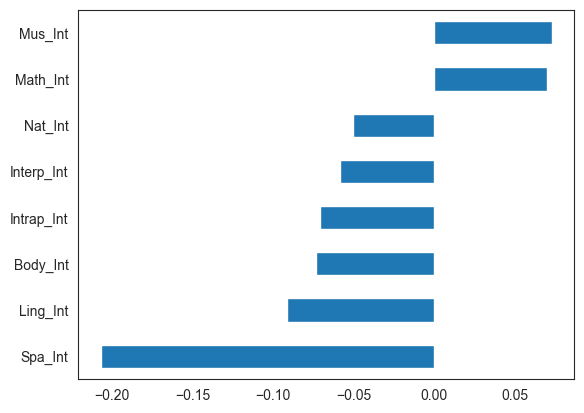

In [46]:
df.corr()["Plt_Or_Not"].drop(["Plt_Or_Not", "Flight_Mean"]).sort_values().plot.barh()

### Train Test

In [47]:
from sklearn.model_selection import train_test_split

X = df.drop(["Plt_Or_Not","Flight_Mean"], axis=1)
y = df["Plt_Or_Not"]
print(f"X_shape \t: {X.shape}")
print(f"y_shape \t: {y.shape}")
print("-"*40)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"X_tain_shape \t: {X_train.shape}")
print(f"X_test_shape \t: {X_test.shape}")
print(f"y_tain_shape \t: {y_train.shape}")
print(f"y_test_shape \t: {y_test.shape}")

X_shape 	: (100, 8)
y_shape 	: (100,)
----------------------------------------
X_tain_shape 	: (70, 8)
X_test_shape 	: (30, 8)
y_tain_shape 	: (70,)
y_test_shape 	: (30,)


### Scaling

In [48]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# MinMaxScaler for X data
scaler_mms = MinMaxScaler ()
X_train_mms = scaler_mms.fit_transform(X_train)
X_test_mms = scaler_mms.transform(X_test)

# StandardScaler for X data
scaler_ss = StandardScaler()
X_train_ss = scaler_ss.fit_transform(X_train)
X_test_ss = scaler_ss.transform(X_test)

### Polyfit

In [49]:
X.head(1)

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int
0,20,19,10,16,13,16,17,22


In [50]:
def check_dist(X, var):
    plt.subplot(1, 2, 1)
    sns.histplot(x=var, data=X)
    plt.subplot(1, 2, 2)
    stats.probplot(df[var], dist="norm", plot=plt)
    plt.tight_layout()
    plt.show()

In [51]:
# for col in X.columns:
#     check_dist(X, col)

In [52]:
np.polyfit(X.Ling_Int, y, deg=3)
# b3--b2--b1--b0

array([-9.00889449e-04,  4.58537275e-02, -7.68853551e-01,  4.84076850e+00])

### PolynomialFeatures

In [53]:
from sklearn.preprocessing import PolynomialFeatures
poly_trans = PolynomialFeatures(degree=3, include_bias=False)
poly_data = poly_trans.fit_transform(X)
print(poly_data.shape)
print(X.shape)

(100, 164)
(100, 8)


## Logistic Regression

### Logistic Regression & Optimal Threshold

In [54]:
# log_model & Not Scaled & Optimal Threshold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

log_model = LogisticRegression(random_state=42)
log_model.fit(X_train, y_train)

y_test_pr = log_model.predict(X_test)
y_test_prd_prb = pd.Series(log_model.predict_proba(X_test)[:,1])

y_train_prd_prb = log_model.predict_proba(X_train)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

log_scores = {"lr": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                     "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                     "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                     "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                     "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

lr_scr = pd.DataFrame(log_scores, index=["acc","prc","rec","f1s", "roc"])
lr_scr

NameError: name 'roc_curve' is not defined

In [ ]:
# log_model & MinMax Scaled & Optimal Threshold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

log_model = LogisticRegression(random_state=42)
log_model.fit(X_train_mms, y_train)

y_test_prd = log_model.predict(X_test_mms)
y_test_prd_prb = pd.Series(log_model.predict_proba(X_test_mms)[:,1])

y_train_prd_prb = log_model.predict_proba(X_train_mms)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

log_scores = {"lr_mms": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                         "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                         "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                         "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                         "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

lr_mms_scr = pd.DataFrame(log_scores, index=["acc","prc","rec","f1s", "roc"])
lr_mms_scr

,lr_mms
acc,0.50
prc,0.48
rec,0.86
f1s,0.62
roc,0.52


In [ ]:
# log_model & Standard Scaled & Optimal Threshold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

log_model = LogisticRegression(random_state=42)
log_model.fit(X_train_ss, y_train)

y_test_prd = log_model.predict(X_test_ss)
y_test_prd_prb = pd.Series(log_model.predict_proba(X_test_ss)[:,1])

y_train_prd_prb = log_model.predict_proba(X_train_ss)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

log_scores = {"lr_ss": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                        "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                        "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                        "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                        "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

lr_ss_scr = pd.DataFrame(log_scores, index=["acc","prc","rec","f1s", "roc"])
lr_ss_scr

,lr_ss
acc,0.53
prc,0.50
rec,0.71
f1s,0.59
roc,0.54


In [ ]:
lr_def_scrs = pd.concat([lr_scr, lr_mms_scr, lr_ss_scr], axis=1)
lr_def_scrs

,lr,lr_mms,lr_ss
acc,0.53,0.50,0.53
prc,0.50,0.48,0.50
rec,0.71,0.86,0.71
f1s,0.59,0.62,0.59
roc,0.54,0.52,0.54


### Logistic Regression & GridSearchCV & Optimal Threshold

In [ ]:
# log_model & Not Scaled & GridSearchCV & Optimal Threshold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
log_model = LogisticRegression(random_state=42)

penalty = ["l1", "l2", "elasticnet"]
l1_ratio = np.linspace(0, 1, 20)
C = np.logspace(0, 10, 20)
param_grid = {"penalty" : penalty,
              "l1_ratio" : l1_ratio,
              "C" : C}

lm_grd = GridSearchCV(estimator=log_model,
                      param_grid=param_grid)

lm_grd.fit(X_train, y_train)
y_test_prd = lm_grd.predict(X_test)
y_test_prd_prb = pd.Series(lm_grd.predict_proba(X_test)[:,1])

y_train_prd_prb = lm_grd.predict_proba(X_train)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

log_scores = {"lr_grd": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                         "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                         "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                         "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                         "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

lr_scr = pd.DataFrame(log_scores, index=["acc","prc","rec","f1s", "roc"])
lr_scr

,lr_grd
acc,0.53
prc,0.50
rec,0.71
f1s,0.59
roc,0.54


In [ ]:
# log_model & MinMax Scaled & GridSearchCV & Optimal Threshold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
log_model = LogisticRegression(random_state=42)

penalty = ["l1", "l2", "elasticnet"]
l1_ratio = np.linspace(0, 1, 20)
C = np.logspace(0, 10, 20)
param_grid = {"penalty" : penalty,
              "l1_ratio" : l1_ratio,
              "C" : C}

lm_grd = GridSearchCV(estimator=log_model,
                      param_grid=param_grid)

lm_grd.fit(X_train_mms, y_train)

y_test_prd = lm_grd.predict(X_test_mms)
y_test_prd_prb = pd.Series(lm_grd.predict_proba(X_test_mms)[:,1])

y_train_prd_prb = lm_grd.predict_proba(X_train_mms)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

log_scores = {"lr_grd_mms": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                             "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                             "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                             "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                             "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

lr_mms_scr = pd.DataFrame(log_scores, index=["acc","prc","rec","f1s", "roc"])
lr_mms_scr

,lr_grd_mms
acc,0.50
prc,0.48
rec,0.86
f1s,0.62
roc,0.52


In [ ]:
# log_model & Standard Scaled & GridSearchCV & Optimal Threshold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
log_model = LogisticRegression(random_state=42)

penalty = ["l1", "l2", "elasticnet"]
l1_ratio = np.linspace(0, 1, 20)
C = np.logspace(0, 10, 20)
param_grid = {"penalty" : penalty,
              "l1_ratio" : l1_ratio,
              "C" : C}

lm_grd = GridSearchCV(estimator=log_model,
                      param_grid=param_grid)

lm_grd.fit(X_train_ss, y_train)

y_test_prd = lm_grd.predict(X_test_ss)
y_test_prd_prb = pd.Series(lm_grd.predict_proba(X_test_ss)[:,1])

y_train_prd_prb = lm_grd.predict_proba(X_train_ss)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

log_scores = {"lr_grd_ss": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                            "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                            "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                            "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                            "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

lr_ss_scr = pd.DataFrame(log_scores, index=["acc","prc","rec","f1s", "roc"])
lr_ss_scr

,lr_grd_ss
acc,0.53
prc,0.50
rec,0.71
f1s,0.59
roc,0.54


In [ ]:
lr_grd_scrs = pd.concat([lr_scr, lr_mms_scr, lr_ss_scr], axis=1)
lr_grd_scrs

,lr_grd,lr_grd_mms,lr_grd_ss
acc,0.53,0.50,0.53
prc,0.50,0.48,0.50
rec,0.71,0.86,0.71
f1s,0.59,0.62,0.59
roc,0.54,0.52,0.54


In [ ]:
lr_mid_scrs = pd.concat([lr_def_scrs, lr_grd_scrs], axis=1)
lr_mid_scrs.columns = ["lr","lr_grd","lr_mms","lr_grd_mms","lr_ss","lr_grd_ss"]
lr_mid_scrs

,lr,lr_grd,lr_mms,lr_grd_mms,lr_ss,lr_grd_ss
acc,0.53,0.50,0.53,0.53,0.50,0.53
prc,0.50,0.48,0.50,0.50,0.48,0.50
rec,0.71,0.86,0.71,0.71,0.86,0.71
f1s,0.59,0.62,0.59,0.59,0.62,0.59
roc,0.54,0.52,0.54,0.54,0.52,0.54


### Logistic Regression & CV

In [ ]:
# log_model & Not Scaled & CV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

model = LogisticRegression(random_state=42)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                        cv = 10)
lr_cv_scr = pd.DataFrame(scores, index = range(1, 11))
lr_cv_scr = lr_cv_scr.mean()[2:]
lr_cv_scr

test_accuracy    0.56
test_precision   0.59
test_recall      0.81
test_f1          0.68
test_roc_auc     0.45
dtype: float64

In [ ]:
# log_model & MinMax Scaled & CV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

model = LogisticRegression(random_state=42)

scores = cross_validate(model,
                        X_train_mms,
                        y_train,
                        scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                        cv = 10)
lr_mms_cv_scr = pd.DataFrame(scores, index = range(1, 11))
lr_mms_cv_scr = lr_mms_cv_scr.mean()[2:]
lr_mms_cv_scr

test_accuracy    0.61
test_precision   0.62
test_recall      0.97
test_f1          0.76
test_roc_auc     0.43
dtype: float64

In [ ]:
# log_model & Standard Scaled & CV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

model = LogisticRegression(random_state=42)

scores = cross_validate(model,
                        X_train_ss,
                        y_train,
                        scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                        cv = 10)
lr_ss_cv_scr = pd.DataFrame(scores, index = range(1, 11))
lr_ss_cv_scr = lr_ss_cv_scr.mean()[2:]
lr_ss_cv_scr

test_accuracy    0.57
test_precision   0.60
test_recall      0.83
test_f1          0.69
test_roc_auc     0.43
dtype: float64

In [ ]:
lr_cv_scrs = pd.concat([lr_cv_scr, lr_mms_cv_scr, lr_ss_cv_scr], axis=1)
lr_cv_scrs.rename(columns={0:"lr_cv",
                           1:"lr_cv_mms",
                           2:"lr_cv_ss"},
                       index={"test_accuracy":"acc",
                              "test_precision":"prc",
                              "test_recall":"rec",
                              "test_f1":"f1s",
                              "test_roc_auc":"roc"},
                       inplace=True)
lr_cv_scrs

,lr_cv,lr_cv_mms,lr_cv_ss
acc,0.56,0.61,0.57
prc,0.59,0.62,0.60
rec,0.81,0.97,0.83
f1s,0.68,0.76,0.69
roc,0.45,0.43,0.43


In [ ]:
lr_cum_scrs = pd.concat([lr_def_scrs, lr_grd_scrs, lr_cv_scrs], axis=1)
lr_cum_scrs.columns = ["lr","lr_grd","lr_cv","lr_mms","lr_grd_mms","lr_cv_mms","lr_ss","lr_grd_ss","lr_cv_ss"]
lr_cum_scrs

,lr,lr_grd,lr_cv,lr_mms,lr_grd_mms,lr_cv_mms,lr_ss,lr_grd_ss,lr_cv_ss
acc,0.53,0.50,0.53,0.53,0.50,0.53,0.56,0.61,0.57
prc,0.50,0.48,0.50,0.50,0.48,0.50,0.59,0.62,0.60
rec,0.71,0.86,0.71,0.71,0.86,0.71,0.81,0.97,0.83
f1s,0.59,0.62,0.59,0.59,0.62,0.59,0.68,0.76,0.69
roc,0.54,0.52,0.54,0.54,0.52,0.54,0.45,0.43,0.43


## KNN

### KNN & Elbow & "k"

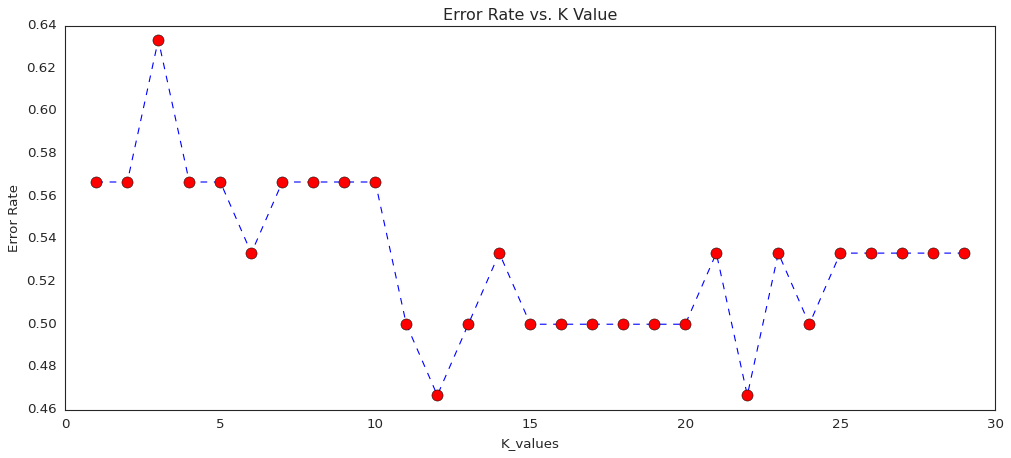

In [ ]:
# knn_model & Not Scaled & Best "k"
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

test_error_rates = []
for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k, p =1, weights="uniform")
    knn_model.fit(X_train, y_train) 
    pred = knn_model.predict(X_test)
    test_error = 1 - accuracy_score(y_test, pred)
    test_error_rates.append(test_error)

plt.figure(figsize=(15,6))
plt.plot(range(1,30),
         test_error_rates,
         color='blue',
         linestyle='--',
         marker='o',
         markerfacecolor='red',
         markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.style.use('classic')
#sns.set_style("white")
# Best "k"=5=Default

### KNN & Optimal Threshold

In [ ]:
# knn_model & Not Scaled & Optimal Threshold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

y_test_prd = knn_model.predict(X_test)
y_test_prd_prb = pd.Series(knn_model.predict_proba(X_test)[:,1])

y_train_prd_prb = knn_model.predict_proba(X_train)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

knn_scores = {"knn": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                      "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                      "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                      "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                      "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

knn_scr = pd.DataFrame(knn_scores, index=["acc","prc","rec","f1s", "roc"])
knn_scr

,knn
acc,0.40
prc,0.42
rec,0.79
f1s,0.55
roc,0.42


In [ ]:
# knn_model & MinMax Scaled & Optimal Threshold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_model = KNeighborsClassifier()
knn_model.fit(X_train_mms, y_train)

y_test_prd = knn_model.predict(X_test_mms)
y_test_prd_prb = pd.Series(knn_model.predict_proba(X_test_mms)[:,1])

y_train_prd_prb = knn_model.predict_proba(X_train_mms)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

knn_scores = {"knn_mms": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                          "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                          "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                          "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                          "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

knn_mms_scr = pd.DataFrame(knn_scores, index=["acc","prc","rec","f1s", "roc"])
knn_mms_scr

,knn_mms
acc,0.43
prc,0.41
rec,0.50
f1s,0.45
roc,0.44


In [ ]:
# knn_model & Standard Scaled & Optimal Threshold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_model = KNeighborsClassifier()
knn_model.fit(X_train_ss, y_train)

y_test_prd = knn_model.predict(X_test_ss)
y_test_prd_prb = pd.Series(knn_model.predict_proba(X_test_ss)[:,1])

y_train_prd_prb = knn_model.predict_proba(X_train_ss)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

knn_scores = {"knn_ss": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                         "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                         "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                         "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                         "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

knn_ss_scr = pd.DataFrame(knn_scores, index=["acc","prc","rec","f1s", "roc"])
knn_ss_scr

,knn_ss
acc,0.40
prc,0.42
rec,0.71
f1s,0.53
roc,0.42


In [ ]:
knn_def_scrs = pd.concat([knn_scr, knn_mms_scr, knn_ss_scr], axis=1)
knn_def_scrs

,knn,knn_mms,knn_ss
acc,0.40,0.43,0.40
prc,0.42,0.41,0.42
rec,0.79,0.50,0.71
f1s,0.55,0.45,0.53
roc,0.42,0.44,0.42


### KNN & GridSearchCV & Optimal Threshold

In [ ]:
# knn_model & Not Scaled & GridSearchCV & Optimal Threshold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn_model = KNeighborsClassifier()
k_values= range(1,30)
param_grid = {"n_neighbors":k_values,
              "p": [1,2],
              "weights": ['uniform', "distance"]}
knn_grd = GridSearchCV(knn_model, param_grid, cv=10, scoring= 'accuracy')

knn_grd.fit(X_train, y_train)
y_test_prd = knn_grd.predict(X_test)
y_test_prd_prb = pd.Series(knn_grd.predict_proba(X_test)[:,1])

y_train_prd_prb = knn_grd.predict_proba(X_train)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

knn_scores = {"knn_grd": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                          "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                          "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                          "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                          "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

knn_scr = pd.DataFrame(knn_scores, index=["acc","prc","rec","f1s", "roc"])
print(knn_grd.best_params_)
knn_scr

{'n_neighbors': 5, 'p': 2, 'weights': 'distance'}


,knn_grd
acc,0.57
prc,0.67
rec,0.14
f1s,0.24
roc,0.54


In [ ]:
# knn_model & MinMax Scaled & GridSearchCV & Optimal Threshold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn_model = KNeighborsClassifier()
k_values= range(1,30)
param_grid = {"n_neighbors":k_values,
              "p": [1,2],
              "weights": ['uniform', "distance"]}
knn_grd = GridSearchCV(knn_model, param_grid, cv=10, scoring= 'accuracy')

knn_grd.fit(X_train_mms, y_train)
y_test_prd = knn_grd.predict(X_test_mms)
y_test_prd_prb = pd.Series(knn_grd.predict_proba(X_test_mms)[:,1])

y_train_prd_prb = knn_grd.predict_proba(X_train_mms)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

knn_scores = {"knn_grd_mms": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                              "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                              "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                              "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                              "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

knn_mms_scr = pd.DataFrame(knn_scores, index=["acc","prc","rec","f1s", "roc"])
print(knn_grd.best_params_)
knn_mms_scr

{'n_neighbors': 20, 'p': 1, 'weights': 'uniform'}


,knn_grd_mms
acc,0.47
prc,0.25
rec,0.07
f1s,0.11
roc,0.44


In [ ]:
# knn_model & Standard Scaled & Optimal Threshold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn_model = KNeighborsClassifier()
k_values= range(1,30)
param_grid = {"n_neighbors":k_values,
              "p": [1,2],
              "weights": ['uniform', "distance"]}
knn_grd = GridSearchCV(knn_model, param_grid, cv=10, scoring= 'accuracy')

knn_grd.fit(X_train_ss, y_train)
y_test_prd = knn_grd.predict(X_test_ss)
y_test_prd_prb = pd.Series(knn_grd.predict_proba(X_test_ss)[:,1])

y_train_prd_prb = knn_grd.predict_proba(X_train_ss)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

knn_scores = {"knn_grd_ss": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                             "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                             "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                             "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                             "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

knn_ss_scr = pd.DataFrame(knn_scores, index=["acc","prc","rec","f1s", "roc"])
print(knn_grd.best_params_)
knn_ss_scr

{'n_neighbors': 20, 'p': 1, 'weights': 'uniform'}


,knn_grd_ss
acc,0.50
prc,0.48
rec,0.93
f1s,0.63
roc,0.53


In [ ]:
knn_grd_scrs = pd.concat([knn_scr, knn_mms_scr, knn_ss_scr], axis=1)
knn_grd_scrs

,knn_grd,knn_grd_mms,knn_grd_ss
acc,0.57,0.47,0.50
prc,0.67,0.25,0.48
rec,0.14,0.07,0.93
f1s,0.24,0.11,0.63
roc,0.54,0.44,0.53


In [ ]:
knn_mid_scrs = pd.concat([knn_def_scrs, knn_grd_scrs], axis=1)
knn_mid_scrs.columns = ["knn","knn_grd","knn_mms","knn_grd_mms","knn_ss","knn_grd_ss"]
knn_mid_scrs

,knn,knn_grd,knn_mms,knn_grd_mms,knn_ss,knn_grd_ss
acc,0.40,0.43,0.40,0.57,0.47,0.50
prc,0.42,0.41,0.42,0.67,0.25,0.48
rec,0.79,0.50,0.71,0.14,0.07,0.93
f1s,0.55,0.45,0.53,0.24,0.11,0.63
roc,0.42,0.44,0.42,0.54,0.44,0.53


### KNN & CV

In [ ]:
# knn_model & Not Scaled & CV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate

model = KNeighborsClassifier(n_neighbors=5, weights="distance", p=2)
scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                        cv = 10)
knn_cv_scr = pd.DataFrame(scores, index = range(1, 11))
knn_cv_scr = knn_cv_scr.mean()[2:]
knn_cv_scr

test_accuracy    0.64
test_precision   0.68
test_recall      0.86
test_f1          0.75
test_roc_auc     0.55
dtype: float64

In [ ]:
# knn_model & MinMax Scaled & CV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate

model = KNeighborsClassifier(n_neighbors=20, weights="uniform", p=1)
scores = cross_validate(model,
                        X_train_mms,
                        y_train,
                        scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                        cv = 10)
knn_mms_cv_scr = pd.DataFrame(scores, index = range(1, 11))
knn_mms_cv_scr = knn_mms_cv_scr.mean()[2:]
knn_mms_cv_scr

test_accuracy    0.64
test_precision   0.64
test_recall      1.00
test_f1          0.78
test_roc_auc     0.44
dtype: float64

In [ ]:
# knn_model & Standard Scaled & CV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate

model = KNeighborsClassifier(n_neighbors=20, weights="uniform", p=1)
scores = cross_validate(model,
                        X_train_ss,
                        y_train,
                        scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                        cv = 10)
knn_ss_cv_scr = pd.DataFrame(scores, index = range(1, 11))
knn_ss_cv_scr = knn_ss_cv_scr.mean()[2:]
knn_ss_cv_scr

test_accuracy    0.66
test_precision   0.65
test_recall      1.00
test_f1          0.79
test_roc_auc     0.49
dtype: float64

In [ ]:
knn_cv_scrs = pd.concat([knn_cv_scr, knn_mms_cv_scr, knn_ss_cv_scr], axis=1)
knn_cv_scrs.rename(columns={0:"knn_cv",
                            1:"knn_cv_mms",
                            2:"knn_cv_ss"},
                       index={"test_accuracy":"acc",
                              "test_precision":"prc",
                              "test_recall":"rec",
                              "test_f1":"f1s",
                              "test_roc_auc":"roc"},
                       inplace=True)
knn_cv_scrs

,knn_cv,knn_cv_mms,knn_cv_ss
acc,0.64,0.64,0.66
prc,0.68,0.64,0.65
rec,0.86,1.00,1.00
f1s,0.75,0.78,0.79
roc,0.55,0.44,0.49


In [ ]:
knn_cum_scrs = pd.concat([knn_def_scrs, knn_grd_scrs, knn_cv_scrs], axis=1)
knn_cum_scrs.columns = ["knn","knn_grd","knn_cv","knn_mms","knn_grd_mms","knn_cv_mms","knn_ss","knn_grd_ss","knn_cv_ss"]
knn_cum_scrs

,knn,knn_grd,knn_cv,knn_mms,knn_grd_mms,knn_cv_mms,knn_ss,knn_grd_ss,knn_cv_ss
acc,0.40,0.43,0.40,0.57,0.47,0.50,0.64,0.64,0.66
prc,0.42,0.41,0.42,0.67,0.25,0.48,0.68,0.64,0.65
rec,0.79,0.50,0.71,0.14,0.07,0.93,0.86,1.00,1.00
f1s,0.55,0.45,0.53,0.24,0.11,0.63,0.75,0.78,0.79
roc,0.42,0.44,0.42,0.54,0.44,0.53,0.55,0.44,0.49


## SVC

### SVC & Optimal Threshold

In [ ]:
# svc_model & Not Scaled & Optimal Threshold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc_model = SVC(probability=True)
svc_model.fit(X_train, y_train)

y_test_prd = svc_model.predict(X_test)
y_test_prd_prb = pd.Series(svc_model.predict_proba(X_test)[:,1])

y_train_prd_prb = svc_model.predict_proba(X_train)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

svc_scores = {"svc": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                      "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                      "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                      "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                      "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

svc_scr = pd.DataFrame(svc_scores, index=["acc","prc","rec","f1s", "roc"])
svc_scr

,svc
acc,0.53
prc,0.00
rec,0.00
f1s,0.00
roc,0.50


In [ ]:
# knn_model & MinMax Scaled & Optimal Threshold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc_model = SVC(probability=True)
svc_model.fit(X_train_mms, y_train)

y_test_prd = svc_model.predict(X_test_mms)
y_test_prd_prb = pd.Series(svc_model.predict_proba(X_test_mms)[:,1])

y_train_prd_prb = svc_model.predict_proba(X_train_mms)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

svc_scores = {"svc_mms": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                          "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                          "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                          "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                          "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

svc_mms_scr = pd.DataFrame(svc_scores, index=["acc","prc","rec","f1s", "roc"])
svc_mms_scr

,svc_mms
acc,0.53
prc,0.00
rec,0.00
f1s,0.00
roc,0.50


In [ ]:
# knn_model & Standard Scaled & Optimal Threshold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc_model = SVC(probability=True)
svc_model.fit(X_train_ss, y_train)

y_test_prd = svc_model.predict(X_test_ss)
y_test_prd_prb = pd.Series(svc_model.predict_proba(X_test_ss)[:,1])

y_train_prd_prb = svc_model.predict_proba(X_train_ss)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

svc_scores = {"svc_ss": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                         "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                         "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                         "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                         "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

svc_ss_scr = pd.DataFrame(svc_scores, index=["acc","prc","rec","f1s", "roc"])
svc_ss_scr

,svc_ss
acc,0.53
prc,0.00
rec,0.00
f1s,0.00
roc,0.50


In [ ]:
svc_def_scrs = pd.concat([svc_scr, svc_mms_scr, svc_ss_scr], axis=1)
svc_def_scrs

,svc,svc_mms,svc_ss
acc,0.53,0.53,0.53
prc,0.00,0.00,0.00
rec,0.00,0.00,0.00
f1s,0.00,0.00,0.00
roc,0.50,0.50,0.50


### SVC & GridSearchCV & Optimal Threshold

In [ ]:
# svc_model & Not Scaled & GridSearchCV & Optimal Threshold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc_model = SVC(probability=True)
param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1],
              'gamma': ["scale", "auto", 1,0.1,0.01,0.001,0.0001],
              'kernel': ['rbf', 'linear']}
svc_grd = GridSearchCV(svc_model, param_grid, verbose=3, refit=True)

svc_grd.fit(X_train, y_train)
y_test_prd = svc_grd.predict(X_test)
y_test_prd_prb = pd.Series(svc_grd.predict_proba(X_test)[:,1])

y_train_prd_prb = svc_grd.predict_proba(X_train)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

svc_scores = {"svc_grd": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                          "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                          "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                          "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                          "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

svc_scr = pd.DataFrame(svc_scores, index=["acc","prc","rec","f1s", "roc"])
print(svc_grd.best_params_)
svc_scr

Fitting 5 folds for each of 70 candidates, totalling 350 fits
[CV 1/5] END .C=0.0001, gamma=scale, kernel=rbf;, score=0.643 total time=   0.0s
[CV 2/5] END .C=0.0001, gamma=scale, kernel=rbf;, score=0.643 total time=   0.0s
[CV 3/5] END .C=0.0001, gamma=scale, kernel=rbf;, score=0.643 total time=   0.0s
[CV 4/5] END .C=0.0001, gamma=scale, kernel=rbf;, score=0.643 total time=   0.0s
[CV 5/5] END .C=0.0001, gamma=scale, kernel=rbf;, score=0.571 total time=   0.0s
[CV 1/5] END C=0.0001, gamma=scale, kernel=linear;, score=0.643 total time=   0.0s
[CV 2/5] END C=0.0001, gamma=scale, kernel=linear;, score=0.643 total time=   0.0s
[CV 3/5] END C=0.0001, gamma=scale, kernel=linear;, score=0.643 total time=   0.0s
[CV 4/5] END C=0.0001, gamma=scale, kernel=linear;, score=0.643 total time=   0.0s
[CV 5/5] END C=0.0001, gamma=scale, kernel=linear;, score=0.571 total time=   0.0s
[CV 1/5] END ..C=0.0001, gamma=auto, kernel=rbf;, score=0.643 total time=   0.0s
[CV 2/5] END ..C=0.0001, gamma=auto, 

,svc_grd
acc,0.53
prc,0.00
rec,0.00
f1s,0.00
roc,0.50


In [ ]:
# svc_model & MinMax Scaled & GridSearchCV & Optimal Threshold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc_model = SVC(probability=True)
param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1],
              'gamma': ["scale", "auto", 1,0.1,0.01,0.001,0.0001],
              'kernel': ['rbf', 'linear']}
svc_grd = GridSearchCV(svc_model, param_grid, verbose=3, refit=True)

svc_grd.fit(X_train_mms, y_train)
y_test_prd = svc_grd.predict(X_test_mms)
y_test_prd_prb = pd.Series(svc_grd.predict_proba(X_test_mms)[:,1])

y_train_prd_prb = svc_grd.predict_proba(X_train_mms)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

svc_scores = {"svc_grd_mms": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                              "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                              "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                              "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                              "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

svc_mms_scr = pd.DataFrame(svc_scores, index=["acc","prc","rec","f1s", "roc"])
print(svc_grd.best_params_)
svc_mms_scr

Fitting 5 folds for each of 70 candidates, totalling 350 fits
[CV 1/5] END .C=0.0001, gamma=scale, kernel=rbf;, score=0.643 total time=   0.0s
[CV 2/5] END .C=0.0001, gamma=scale, kernel=rbf;, score=0.643 total time=   0.0s
[CV 3/5] END .C=0.0001, gamma=scale, kernel=rbf;, score=0.643 total time=   0.0s
[CV 4/5] END .C=0.0001, gamma=scale, kernel=rbf;, score=0.643 total time=   0.0s
[CV 5/5] END .C=0.0001, gamma=scale, kernel=rbf;, score=0.571 total time=   0.0s
[CV 1/5] END C=0.0001, gamma=scale, kernel=linear;, score=0.643 total time=   0.0s
[CV 2/5] END C=0.0001, gamma=scale, kernel=linear;, score=0.643 total time=   0.0s
[CV 3/5] END C=0.0001, gamma=scale, kernel=linear;, score=0.643 total time=   0.0s
[CV 4/5] END C=0.0001, gamma=scale, kernel=linear;, score=0.643 total time=   0.0s
[CV 5/5] END C=0.0001, gamma=scale, kernel=linear;, score=0.571 total time=   0.0s
[CV 1/5] END ..C=0.0001, gamma=auto, kernel=rbf;, score=0.643 total time=   0.0s
[CV 2/5] END ..C=0.0001, gamma=auto, 

,svc_grd_mms
acc,0.53
prc,0.00
rec,0.00
f1s,0.00
roc,0.50


In [ ]:
# svc_model & Standard Scaled & Optimal Threshold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc_model = SVC(probability=True)
param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1],
              'gamma': ["scale", "auto", 1,0.1,0.01,0.001,0.0001],
              'kernel': ['rbf', 'linear']}
svc_grd = GridSearchCV(svc_model, param_grid, verbose=3, refit=True)

svc_grd.fit(X_train_ss, y_train)
y_test_prd = svc_grd.predict(X_test_ss)
y_test_prd_prb = pd.Series(svc_grd.predict_proba(X_test_ss)[:,1])

y_train_prd_prb = svc_grd.predict_proba(X_train_ss)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

svc_scores = {"svc_grd_ss": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                             "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                             "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                             "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                             "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

svc_ss_scr = pd.DataFrame(svc_scores, index=["acc","prc","rec","f1s", "roc"])
print(svc_grd.best_params_)
svc_ss_scr

Fitting 5 folds for each of 70 candidates, totalling 350 fits
[CV 1/5] END .C=0.0001, gamma=scale, kernel=rbf;, score=0.643 total time=   0.0s
[CV 2/5] END .C=0.0001, gamma=scale, kernel=rbf;, score=0.643 total time=   0.0s
[CV 3/5] END .C=0.0001, gamma=scale, kernel=rbf;, score=0.643 total time=   0.0s
[CV 4/5] END .C=0.0001, gamma=scale, kernel=rbf;, score=0.643 total time=   0.0s
[CV 5/5] END .C=0.0001, gamma=scale, kernel=rbf;, score=0.571 total time=   0.0s
[CV 1/5] END C=0.0001, gamma=scale, kernel=linear;, score=0.643 total time=   0.0s
[CV 2/5] END C=0.0001, gamma=scale, kernel=linear;, score=0.643 total time=   0.0s
[CV 3/5] END C=0.0001, gamma=scale, kernel=linear;, score=0.643 total time=   0.0s
[CV 4/5] END C=0.0001, gamma=scale, kernel=linear;, score=0.643 total time=   0.0s
[CV 5/5] END C=0.0001, gamma=scale, kernel=linear;, score=0.571 total time=   0.0s
[CV 1/5] END ..C=0.0001, gamma=auto, kernel=rbf;, score=0.643 total time=   0.0s
[CV 2/5] END ..C=0.0001, gamma=auto, 

,svc_grd_ss
acc,0.53
prc,0.00
rec,0.00
f1s,0.00
roc,0.50


In [ ]:
svc_grd_scrs = pd.concat([svc_scr, svc_mms_scr, svc_ss_scr], axis=1)
svc_grd_scrs

,svc_grd,svc_grd_mms,svc_grd_ss
acc,0.53,0.53,0.53
prc,0.00,0.00,0.00
rec,0.00,0.00,0.00
f1s,0.00,0.00,0.00
roc,0.50,0.50,0.50


In [ ]:
svc_mid_scrs = pd.concat([svc_def_scrs, svc_grd_scrs], axis=1)
svc_mid_scrs.columns = ["svc","svc_grd","svc_mms","svc_grd_mms","svc_ss","svc_grd_ss"]
svc_mid_scrs

,svc,svc_grd,svc_mms,svc_grd_mms,svc_ss,svc_grd_ss
acc,0.53,0.53,0.53,0.53,0.53,0.53
prc,0.00,0.00,0.00,0.00,0.00,0.00
rec,0.00,0.00,0.00,0.00,0.00,0.00
f1s,0.00,0.00,0.00,0.00,0.00,0.00
roc,0.50,0.50,0.50,0.50,0.50,0.50


### SVC & CV

In [ ]:
# svc_model & Not Scaled & CV
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate

model = SVC(probability=True)
scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                        cv = 10)
svc_cv_scr = pd.DataFrame(scores, index = range(1, 11))
svc_cv_scr = svc_cv_scr.mean()[2:]
svc_cv_scr

test_accuracy    0.61
test_precision   0.62
test_recall      0.97
test_f1          0.76
test_roc_auc     0.47
dtype: float64

In [ ]:
# svc_model & MinMax Scaled & CV
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate

model = SVC(probability=True)
scores = cross_validate(model,
                        X_train_mms,
                        y_train,
                        scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                        cv = 10)
svc_mms_cv_scr = pd.DataFrame(scores, index = range(1, 11))
svc_mms_cv_scr = svc_mms_cv_scr.mean()[2:]
svc_mms_cv_scr

test_accuracy    0.63
test_precision   0.63
test_recall      1.00
test_f1          0.77
test_roc_auc     0.46
dtype: float64

In [ ]:
# svc_model & Standard Scaled & CV
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate

model = SVC(probability=True)
scores = cross_validate(model,
                        X_train_ss,
                        y_train,
                        scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                        cv = 10)
svc_ss_cv_scr = pd.DataFrame(scores, index = range(1, 11))
svc_ss_cv_scr = svc_ss_cv_scr.mean()[2:]
svc_ss_cv_scr

test_accuracy    0.61
test_precision   0.62
test_recall      0.97
test_f1          0.76
test_roc_auc     0.47
dtype: float64

In [ ]:
svc_cv_scrs = pd.concat([svc_cv_scr, svc_mms_cv_scr, svc_ss_cv_scr], axis=1)
svc_cv_scrs.rename(columns={0:"svc_cv",
                            1:"svc_cv_mms",
                            2:"svc_cv_ss"},
                       index={"test_accuracy":"acc",
                              "test_precision":"prc",
                              "test_recall":"rec",
                              "test_f1":"f1s",
                              "test_roc_auc":"roc"},
                       inplace=True)
svc_cv_scrs

,svc_cv,svc_cv_mms,svc_cv_ss
acc,0.61,0.63,0.61
prc,0.62,0.63,0.62
rec,0.97,1.00,0.97
f1s,0.76,0.77,0.76
roc,0.47,0.46,0.47


In [ ]:
svc_cum_scrs = pd.concat([svc_def_scrs, svc_grd_scrs, svc_cv_scrs], axis=1)
svc_cum_scrs.columns = ["svc","svc_grd","svc_cv","svc_mms","svc_grd_mms","svc_cv_mms","svc_ss","svc_grd_ss","svc_cv_ss"]
svc_cum_scrs

,svc,svc_grd,svc_cv,svc_mms,svc_grd_mms,svc_cv_mms,svc_ss,svc_grd_ss,svc_cv_ss
acc,0.53,0.53,0.53,0.53,0.53,0.53,0.61,0.63,0.61
prc,0.00,0.00,0.00,0.00,0.00,0.00,0.62,0.63,0.62
rec,0.00,0.00,0.00,0.00,0.00,0.00,0.97,1.00,0.97
f1s,0.00,0.00,0.00,0.00,0.00,0.00,0.76,0.77,0.76
roc,0.50,0.50,0.50,0.50,0.50,0.50,0.47,0.46,0.47


## DT

### DT & Optimal Threshold

In [ ]:
# dt_model & Not Scaled & Optimal Threshold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

y_test_prd = dt_model.predict(X_test)
y_test_prd_prb = pd.Series(dt_model.predict_proba(X_test)[:,1])

y_train_prd_prb = dt_model.predict_proba(X_train)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

dt_scores = {"dt": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                    "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                    "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                    "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                    "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

dt_scr = pd.DataFrame(dt_scores, index=["acc","prc","rec","f1s", "roc"])
dt_scr

,dt
acc,0.43
prc,0.43
rec,0.71
f1s,0.54
roc,0.45


In [ ]:
# dt_model & MinMax Scaled & Optimal Threshold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_mms, y_train)

y_test_prd = dt_model.predict(X_test_mms)
y_test_prd_prb = pd.Series(dt_model.predict_proba(X_test_mms)[:,1])

y_train_prd_prb = dt_model.predict_proba(X_train_mms)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

dt_scores = {"dt_mms": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                        "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                        "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                        "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                        "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

dt_mms_scr = pd.DataFrame(dt_scores, index=["acc","prc","rec","f1s", "roc"])
dt_mms_scr

,dt_mms
acc,0.47
prc,0.46
rec,0.79
f1s,0.58
roc,0.49


In [ ]:
# dt_model & Standard Scaled & Optimal Threshold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_ss, y_train)

y_test_prd = dt_model.predict(X_test_ss)
y_test_prd_prb = pd.Series(dt_model.predict_proba(X_test_ss)[:,1])

y_train_prd_prb = dt_model.predict_proba(X_train_ss)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

dt_scores = {"dt_ss": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                       "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                       "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                       "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                       "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

dt_ss_scr = pd.DataFrame(dt_scores, index=["acc","prc","rec","f1s", "roc"])
dt_ss_scr

,dt_ss
acc,0.43
prc,0.44
rec,0.79
f1s,0.56
roc,0.46


In [ ]:
dt_def_scrs = pd.concat([dt_scr, dt_mms_scr, dt_ss_scr], axis=1)
dt_def_scrs

,dt,dt_mms,dt_ss
acc,0.43,0.47,0.43
prc,0.43,0.46,0.44
rec,0.71,0.79,0.79
f1s,0.54,0.58,0.56
roc,0.45,0.49,0.46


### DT & GridSearchCV & Optimal Threshold

In [ ]:
# dt_model & Not Scaled & GridSearchCV & Optimal Threshold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_model = DecisionTreeClassifier()
param_grid = {"criterion" :["gini", "entropy", "log_loss"],
              "splitter":["best", "random"],
              "max_features":[None, "auto", "log2", 2, 3],
              "max_depth": [None, 4, 5, 6],
              "min_samples_leaf": [6, 7, 8],
              "min_samples_split": [2, 3, 4]}
dt_grd = GridSearchCV(estimator=dt_model, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs = -1)

dt_grd.fit(X_train, y_train)
y_test_prd = dt_grd.predict(X_test)
y_test_prd_prb = pd.Series(dt_grd.predict_proba(X_test)[:,1])

y_train_prd_prb = dt_grd.predict_proba(X_train)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

dt_scores = {"dt_grd": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                        "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                        "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                        "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                        "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

dt_scr = pd.DataFrame(dt_scores, index=["acc","prc","rec","f1s", "roc"])
print(dt_grd.best_params_)
dt_scr

{'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 7, 'min_samples_split': 2, 'splitter': 'best'}


,dt_grd
acc,0.50
prc,0.47
rec,0.57
f1s,0.52
roc,0.50


In [ ]:
# dt_model & MinMax Scaled & GridSearchCV & Optimal Threshold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_model = DecisionTreeClassifier()
param_grid = {"criterion" :["gini", "entropy", "log_loss"],
              "splitter":["best", "random"],
              "max_features":[None, "auto", "log2", 2, 3],
              "max_depth": [None, 4, 5, 6],
              "min_samples_leaf": [6, 7, 8],
              "min_samples_split": [2, 3, 4]}
dt_grd = GridSearchCV(estimator=dt_model, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs = -1)

dt_grd.fit(X_train_mms, y_train)
y_test_prd = dt_grd.predict(X_test_mms)
y_test_prd_prb = pd.Series(dt_grd.predict_proba(X_test_mms)[:,1])

y_train_prd_prb = dt_grd.predict_proba(X_train_mms)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

dt_scores = {"dt_grd_mms": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                            "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                            "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                            "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                            "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

dt_mms_scr = pd.DataFrame(dt_scores, index=["acc","prc","rec","f1s", "roc"])
print(dt_grd.best_params_)
dt_mms_scr

{'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 7, 'min_samples_split': 3, 'splitter': 'best'}


,dt_grd_mms
acc,0.50
prc,0.47
rec,0.57
f1s,0.52
roc,0.50


In [ ]:
# dt_model & Standard Scaled & Optimal Threshold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_model = DecisionTreeClassifier()
param_grid = {"criterion" :["gini", "entropy", "log_loss"],
              "splitter":["best", "random"],
              "max_features":[None, "auto", "log2", 2, 3],
              "max_depth": [None, 4, 5, 6],
              "min_samples_leaf": [6, 7, 8],
              "min_samples_split": [2, 3, 4]}
dt_grd = GridSearchCV(estimator=dt_model, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs = -1)

dt_grd.fit(X_train_ss, y_train)
y_test_prd = dt_grd.predict(X_test_ss)
y_test_prd_prb = pd.Series(dt_grd.predict_proba(X_test_ss)[:,1])

y_train_prd_prb = dt_grd.predict_proba(X_train_ss)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

dt_scores = {"dt_grd_ss": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                             "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                             "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                             "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                             "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

dt_ss_scr = pd.DataFrame(dt_scores, index=["acc","prc","rec","f1s", "roc"])
print(dt_grd.best_params_)
dt_ss_scr

{'criterion': 'gini', 'max_depth': 5, 'max_features': 3, 'min_samples_leaf': 6, 'min_samples_split': 3, 'splitter': 'best'}


,dt_grd_ss
acc,0.53
prc,0.50
rec,0.50
f1s,0.50
roc,0.53


In [ ]:
dt_grd_scrs = pd.concat([dt_scr, dt_mms_scr, dt_ss_scr], axis=1)
dt_grd_scrs

,dt_grd,dt_grd_mms,dt_grd_ss
acc,0.50,0.50,0.53
prc,0.47,0.47,0.50
rec,0.57,0.57,0.50
f1s,0.52,0.52,0.50
roc,0.50,0.50,0.53


In [ ]:
dt_mid_scrs = pd.concat([dt_def_scrs, dt_grd_scrs], axis=1)
dt_mid_scrs.columns = ["dt","dt_grd","dt_mms","dt_grd_mms","dt_ss","dt_grd_ss"]
dt_mid_scrs

,dt,dt_grd,dt_mms,dt_grd_mms,dt_ss,dt_grd_ss
acc,0.43,0.47,0.43,0.50,0.50,0.53
prc,0.43,0.46,0.44,0.47,0.47,0.50
rec,0.71,0.79,0.79,0.57,0.57,0.50
f1s,0.54,0.58,0.56,0.52,0.52,0.50
roc,0.45,0.49,0.46,0.50,0.50,0.53


### DT & CV

In [ ]:
# dt_model & Not Scaled & CV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

model = DecisionTreeClassifier()
scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                        cv = 10)
dt_cv_scr = pd.DataFrame(scores, index = range(1, 11))
dt_cv_scr = dt_cv_scr.mean()[2:]
dt_cv_scr

test_accuracy    0.57
test_precision   0.67
test_recall      0.64
test_f1          0.64
test_roc_auc     0.55
dtype: float64

In [ ]:
# dt_model & MinMax Scaled & CV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

model = DecisionTreeClassifier()
scores = cross_validate(model,
                        X_train_mms,
                        y_train,
                        scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                        cv = 10)
dt_mms_cv_scr = pd.DataFrame(scores, index = range(1, 11))
dt_mms_cv_scr = dt_mms_cv_scr.mean()[2:]
dt_mms_cv_scr

test_accuracy    0.61
test_precision   0.75
test_recall      0.66
test_f1          0.65
test_roc_auc     0.60
dtype: float64

In [ ]:
# dt_model & Standard Scaled & CV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

model = DecisionTreeClassifier()
scores = cross_validate(model,
                        X_train_ss,
                        y_train,
                        scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                        cv = 10)
dt_ss_cv_scr = pd.DataFrame(scores, index = range(1, 11))
dt_ss_cv_scr = dt_ss_cv_scr.mean()[2:]
dt_ss_cv_scr

test_accuracy    0.60
test_precision   0.72
test_recall      0.65
test_f1          0.64
test_roc_auc     0.58
dtype: float64

In [ ]:
dt_cv_scrs = pd.concat([dt_cv_scr, dt_mms_cv_scr, dt_ss_cv_scr], axis=1)
dt_cv_scrs.rename(columns={0:"dt_cv",
                           1:"dt_cv_mms",
                           2:"dt_cv_ss"},
                  index={"test_accuracy":"acc",
                         "test_precision":"prc",
                         "test_recall":"rec",
                         "test_f1":"f1s",
                         "test_roc_auc":"roc"},
                  inplace=True)
dt_cv_scrs

,dt_cv,dt_cv_mms,dt_cv_ss
acc,0.57,0.61,0.60
prc,0.67,0.75,0.72
rec,0.64,0.66,0.65
f1s,0.64,0.65,0.64
roc,0.55,0.60,0.58


In [ ]:
dt_cum_scrs = pd.concat([dt_def_scrs, dt_grd_scrs, dt_cv_scrs], axis=1)
dt_cum_scrs.columns = ["dt","dt_grd","dt_cv","dt_mms","dt_grd_mms","dt_cv_mms","dt_ss","dt_grd_ss","dt_cv_ss"]
dt_cum_scrs

,dt,dt_grd,dt_cv,dt_mms,dt_grd_mms,dt_cv_mms,dt_ss,dt_grd_ss,dt_cv_ss
acc,0.43,0.47,0.43,0.50,0.50,0.53,0.57,0.61,0.60
prc,0.43,0.46,0.44,0.47,0.47,0.50,0.67,0.75,0.72
rec,0.71,0.79,0.79,0.57,0.57,0.50,0.64,0.66,0.65
f1s,0.54,0.58,0.56,0.52,0.52,0.50,0.64,0.65,0.64
roc,0.45,0.49,0.46,0.50,0.50,0.53,0.55,0.60,0.58


### DT Feature Importances

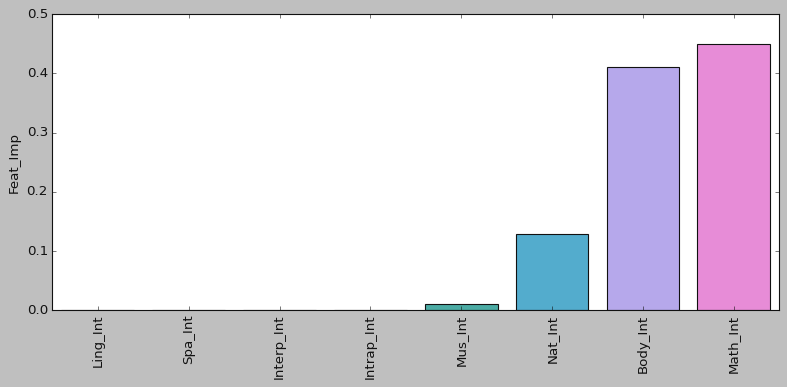

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
model = DecisionTreeClassifier(criterion="gini",
                               max_depth=5,
                               max_features=None,
                               min_samples_leaf=7,
                               min_samples_split=2,
                               splitter="best")
model.fit(X_train, y_train)
Feat_Imp = pd.DataFrame(index=X.columns,
                        data = model.feature_importances_, 
                        columns = ["Feat_Imp"]).sort_values("Feat_Imp")
plt.figure(figsize=(10,5))
sns.barplot(x = Feat_Imp.index, y = 'Feat_Imp', data = Feat_Imp)
plt.xticks(rotation = 90)
plt.tight_layout();

### DT Visualize Tree

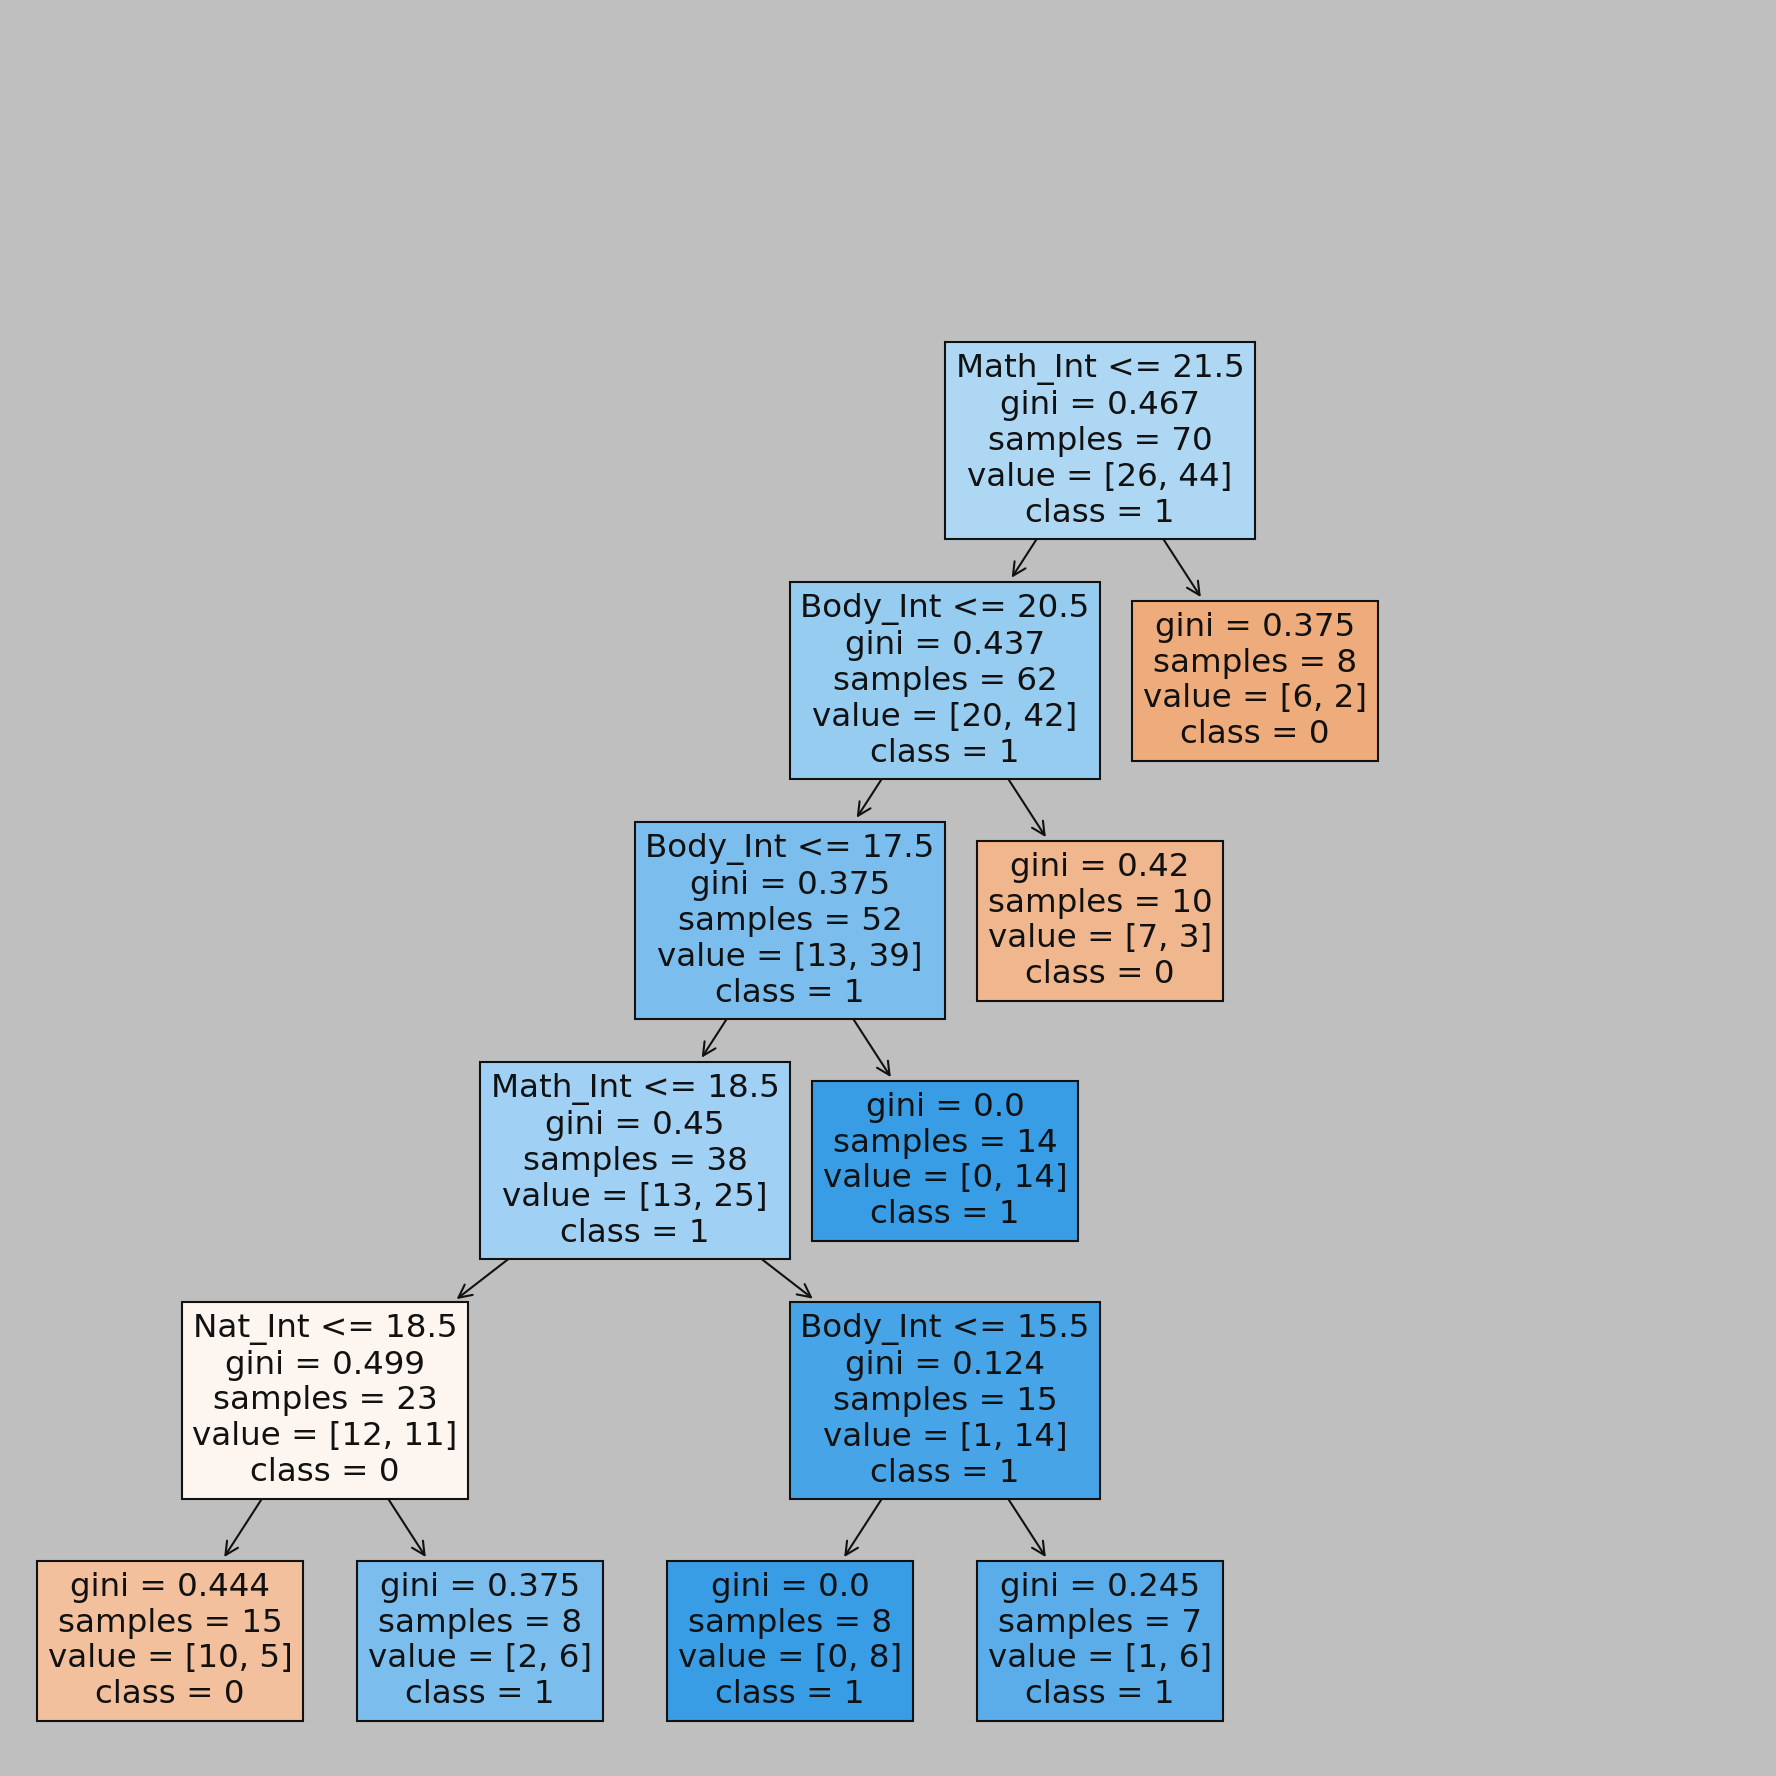

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.tree import plot_tree

model = DecisionTreeClassifier(criterion="gini",
                               max_depth=5,
                               max_features=None,
                               min_samples_leaf=7,
                               min_samples_split=2,
                               splitter="best")
model.fit(X_train, y_train)

plt.figure(figsize=(12,12),dpi=150)
plot_tree(model,
          filled=True,
          feature_names=X.columns,
          class_names = ["0", "1"])
plt.tight_layout();

## RF

### RF & Best n_estimators

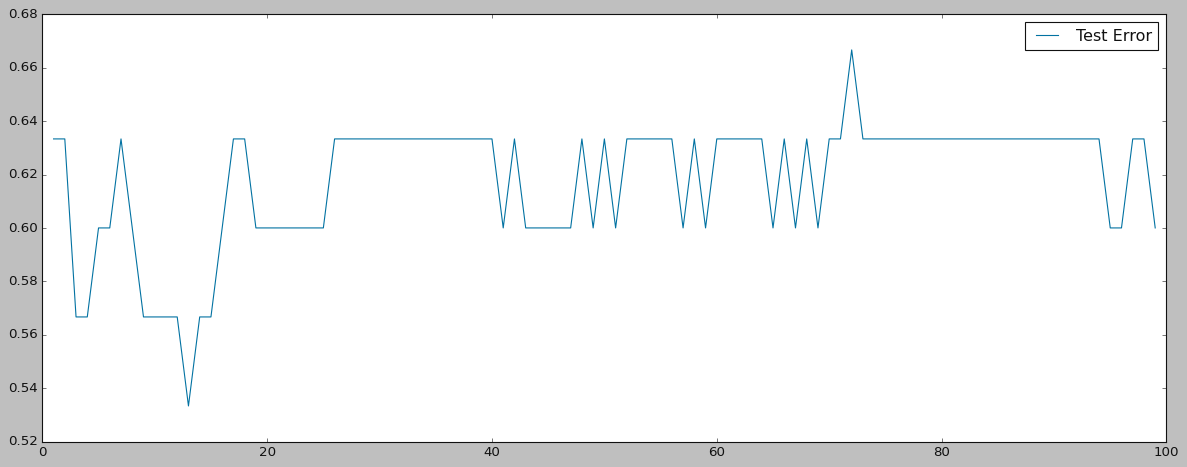

In [ ]:
# rf_model & Not Scaled & Best n_estimators
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

test_error = []

for n in range(1,100):
    model = RandomForestClassifier(n_estimators=n, max_features='auto', random_state=42)
    model.fit(X_train, y_train)
    test_preds = model.predict(X_test)
    test_error.append(1-accuracy_score(test_preds, y_test))
    
plt.figure(figsize=(15,6))
plt.plot(range(1,100), test_error, label='Test Error')
plt.legend()
plt.tight_layout();
# Best "n_estimators"=12

### RF & Optimal Threshold

In [ ]:
# rf_model & Not Scaled & Optimal Threshold
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_test_prd = rf_model.predict(X_test)
y_test_prd_prb = pd.Series(rf_model.predict_proba(X_test)[:,1])

y_train_prd_prb = rf_model.predict_proba(X_train)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

rf_scores = {"rf": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                    "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                    "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                    "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                    "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

rf_scr = pd.DataFrame(rf_scores, index=["acc","prc","rec","f1s", "roc"])
rf_scr

,rf
acc,0.60
prc,0.58
rec,0.50
f1s,0.54
roc,0.59


In [ ]:
# rf_model & MinMax Scaled & Optimal Threshold
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_mms, y_train)

y_test_prd = rf_model.predict(X_test_mms)
y_test_prd_prb = pd.Series(rf_model.predict_proba(X_test_mms)[:,1])

y_train_prd_prb = rf_model.predict_proba(X_train_mms)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

rf_scores = {"rf_mms": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                        "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                        "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                        "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                        "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

rf_mms_scr = pd.DataFrame(rf_scores, index=["acc","prc","rec","f1s", "roc"])
rf_mms_scr

,rf_mms
acc,0.60
prc,0.57
rec,0.57
f1s,0.57
roc,0.60


In [ ]:
# rf_model & Standard Scaled & Optimal Threshold
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_ss, y_train)

y_test_prd = rf_model.predict(X_test_ss)
y_test_prd_prb = pd.Series(rf_model.predict_proba(X_test_ss)[:,1])

y_train_prd_prb = rf_model.predict_proba(X_train_ss)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

rf_scores = {"rf_ss": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                       "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                       "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                       "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                       "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

rf_ss_scr = pd.DataFrame(rf_scores, index=["acc","prc","rec","f1s", "roc"])
rf_ss_scr

,rf_ss
acc,0.57
prc,0.55
rec,0.43
f1s,0.48
roc,0.56


In [ ]:
rf_def_scrs = pd.concat([rf_scr, rf_mms_scr, rf_ss_scr], axis=1)
rf_def_scrs

,rf,rf_mms,rf_ss
acc,0.60,0.60,0.57
prc,0.58,0.57,0.55
rec,0.50,0.57,0.43
f1s,0.54,0.57,0.48
roc,0.59,0.60,0.56


### RF & GridSearchCV & Optimal Threshold

In [ ]:
# rf_model & Not Scaled & GridSearchCV & Optimal Threshold
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score

rf_model = RandomForestClassifier(random_state=42)
param_grid = {'n_estimators':[5, 10, 15, 20, 25, 30],
              'max_features':[2, 3, 4],
              'max_depth':[3, 5, 7, 9],
              'min_samples_split':[2, 5, 8]}
rf_grd = GridSearchCV(rf_model, param_grid, scoring = "accuracy", n_jobs = -1, verbose = 2)

rf_grd.fit(X_train, y_train)
y_test_prd = rf_grd.predict(X_test)
y_test_prd_prb = pd.Series(rf_grd.predict_proba(X_test)[:,1])

y_train_prd_prb = rf_grd.predict_proba(X_train)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

rf_scores = {"rf_grd": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                        "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                        "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                        "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                        "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

rf_scr = pd.DataFrame(rf_scores, index=["acc","prc","rec","f1s", "roc"])
print(rf_grd.best_params_)
rf_scr

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
{'max_depth': 3, 'max_features': 4, 'min_samples_split': 5, 'n_estimators': 25}


,rf_grd
acc,0.43
prc,0.42
rec,0.57
f1s,0.48
roc,0.44


In [ ]:
# rf_model & MinMax Scaled & GridSearchCV & Optimal Threshold
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score

rf_model = RandomForestClassifier(random_state=42)
param_grid = {'n_estimators':[5, 10, 15, 20, 25, 30],
              'max_features':[2, 3, 4],
              'max_depth':[3, 5, 7, 9],
              'min_samples_split':[2, 5, 8]}
rf_grd = GridSearchCV(rf_model, param_grid, scoring = "accuracy", n_jobs = -1, verbose = 2)

rf_grd.fit(X_train_mms, y_train)
y_test_prd = rf_grd.predict(X_test_mms)
y_test_prd_prb = pd.Series(rf_grd.predict_proba(X_test_mms)[:,1])

y_train_prd_prb = rf_grd.predict_proba(X_train_mms)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

rf_scores = {"rf_grd_mms": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                            "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                            "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                            "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                            "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

rf_mms_scr = pd.DataFrame(rf_scores, index=["acc","prc","rec","f1s", "roc"])
print(rf_grd.best_params_)
rf_mms_scr

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
{'max_depth': 5, 'max_features': 2, 'min_samples_split': 5, 'n_estimators': 20}


,rf_grd_mms
acc,0.47
prc,0.45
rec,0.71
f1s,0.56
roc,0.48


In [ ]:
# rf_model & Standard Scaled & Optimal Threshold
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score

rf_model = RandomForestClassifier(random_state=42)
param_grid = {'n_estimators':[5, 10, 15, 20, 25, 30],
              'max_features':[2, 3, 4],
              'max_depth':[3, 5, 7, 9],
              'min_samples_split':[2, 5, 8]}
rf_grd = GridSearchCV(rf_model, param_grid, scoring = "accuracy", n_jobs = -1, verbose = 2)

rf_grd.fit(X_train_ss, y_train)
y_test_prd = rf_grd.predict(X_test_ss)
y_test_prd_prb = pd.Series(rf_grd.predict_proba(X_test_ss)[:,1])

y_train_prd_prb = rf_grd.predict_proba(X_train_ss)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

rf_scores = {"rf_grd_ss": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                           "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                           "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                           "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                           "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

rf_ss_scr = pd.DataFrame(rf_scores, index=["acc","prc","rec","f1s", "roc"])
print(rf_grd.best_params_)
rf_ss_scr

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
{'max_depth': 3, 'max_features': 2, 'min_samples_split': 5, 'n_estimators': 15}


,rf_grd_ss
acc,0.43
prc,0.41
rec,0.50
f1s,0.45
roc,0.44


In [ ]:
rf_grd_scrs = pd.concat([rf_scr, rf_mms_scr, rf_ss_scr], axis=1)
rf_grd_scrs

,rf_grd,rf_grd_mms,rf_grd_ss
acc,0.43,0.47,0.43
prc,0.42,0.45,0.41
rec,0.57,0.71,0.50
f1s,0.48,0.56,0.45
roc,0.44,0.48,0.44


In [ ]:
rf_mid_scrs = pd.concat([rf_def_scrs, rf_grd_scrs], axis=1)
rf_mid_scrs.columns = ["rf","rf_grd","rf_mms","rf_grd_mms","rf_ss","rf_grd_ss"]
rf_mid_scrs

,rf,rf_grd,rf_mms,rf_grd_mms,rf_ss,rf_grd_ss
acc,0.60,0.60,0.57,0.43,0.47,0.43
prc,0.58,0.57,0.55,0.42,0.45,0.41
rec,0.50,0.57,0.43,0.57,0.71,0.50
f1s,0.54,0.57,0.48,0.48,0.56,0.45
roc,0.59,0.60,0.56,0.44,0.48,0.44


### RF & CV

In [ ]:
# rf_model & Not Scaled & CV
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_validate

rf_model = RandomForestClassifier(random_state=42)
scores = cross_validate(rf_model,
                        X_train,
                        y_train,
                        scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                        cv = 10)
rf_cv_scr = pd.DataFrame(scores, index = range(1, 11))
rf_cv_scr = rf_cv_scr.mean()[2:]
rf_cv_scr

test_accuracy    0.61
test_precision   0.64
test_recall      0.84
test_f1          0.72
test_roc_auc     0.62
dtype: float64

In [ ]:
# rf_model & MinMax Scaled & CV
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_validate

rf_model = RandomForestClassifier(random_state=42)
scores = cross_validate(rf_model,
                        X_train_mms,
                        y_train,
                        scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                        cv = 10)
rf_mms_cv_scr = pd.DataFrame(scores, index = range(1, 11))
rf_mms_cv_scr = rf_mms_cv_scr.mean()[2:]
rf_mms_cv_scr

test_accuracy    0.60
test_precision   0.64
test_recall      0.82
test_f1          0.71
test_roc_auc     0.64
dtype: float64

In [ ]:
# dt_model & Standard Scaled & CV
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_validate

rf_model = RandomForestClassifier(random_state=42)
scores = cross_validate(rf_model,
                        X_train_ss,
                        y_train,
                        scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                        cv = 10)
rf_ss_cv_scr = pd.DataFrame(scores, index = range(1, 11))
rf_ss_cv_scr = rf_ss_cv_scr.mean()[2:]
rf_ss_cv_scr

test_accuracy    0.59
test_precision   0.63
test_recall      0.79
test_f1          0.69
test_roc_auc     0.64
dtype: float64

In [ ]:
rf_cv_scrs = pd.concat([rf_cv_scr, rf_mms_cv_scr, rf_ss_cv_scr], axis=1)
rf_cv_scrs.rename(columns={0:"rf_cv",
                           1:"rf_cv_mms",
                           2:"rf_cv_ss"},
                  index={"test_accuracy":"acc",
                         "test_precision":"prc",
                         "test_recall":"rec",
                         "test_f1":"f1s",
                         "test_roc_auc":"roc"},
                  inplace=True)
rf_cv_scrs

,rf_cv,rf_cv_mms,rf_cv_ss
acc,0.61,0.60,0.59
prc,0.64,0.64,0.63
rec,0.84,0.82,0.79
f1s,0.72,0.71,0.69
roc,0.62,0.64,0.64


In [ ]:
rf_cum_scrs = pd.concat([rf_def_scrs, rf_grd_scrs, rf_cv_scrs], axis=1)
rf_cum_scrs.columns = ["rf","rf_grd","rf_cv","rf_mms","rf_grd_mms","rf_cv_mms","rf_ss","rf_grd_ss","rf_cv_ss"]
rf_cum_scrs

,rf,rf_grd,rf_cv,rf_mms,rf_grd_mms,rf_cv_mms,rf_ss,rf_grd_ss,rf_cv_ss
acc,0.60,0.60,0.57,0.43,0.47,0.43,0.61,0.60,0.59
prc,0.58,0.57,0.55,0.42,0.45,0.41,0.64,0.64,0.63
rec,0.50,0.57,0.43,0.57,0.71,0.50,0.84,0.82,0.79
f1s,0.54,0.57,0.48,0.48,0.56,0.45,0.72,0.71,0.69
roc,0.59,0.60,0.56,0.44,0.48,0.44,0.62,0.64,0.64


### RF Feature Importances

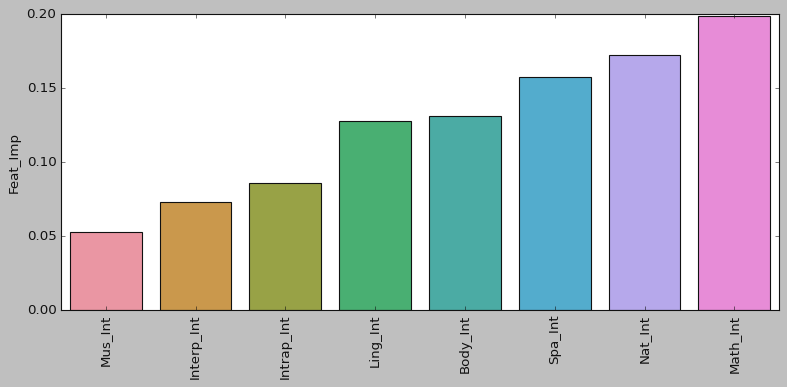

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
model = RandomForestClassifier(max_depth=3,
                               max_features=4,
                               min_samples_split=5,
                               n_estimators=25,
                               random_state=42)
model.fit(X_train, y_train)
Feat_Imp = pd.DataFrame(index=X.columns,
                        data = model.feature_importances_, 
                        columns = ["Feat_Imp"]).sort_values("Feat_Imp")
plt.figure(figsize=(10,5))
sns.barplot(x = Feat_Imp.index, y = 'Feat_Imp', data = Feat_Imp)
plt.xticks(rotation = 90)
plt.tight_layout();

### RF Visualize Tree

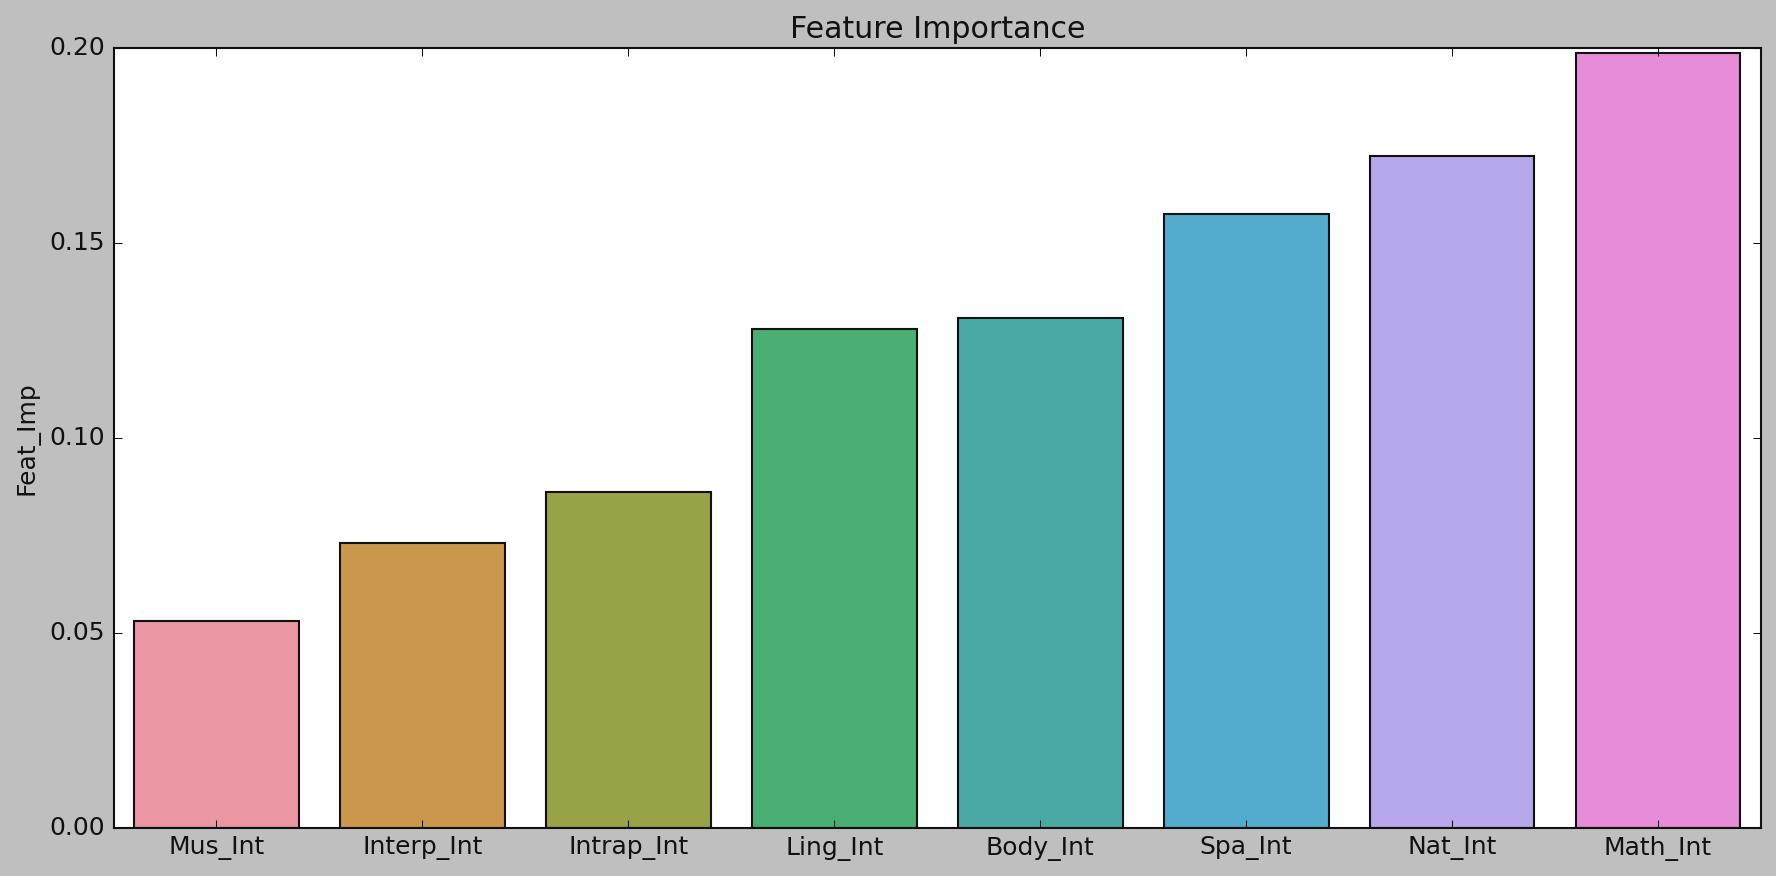

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.tree import plot_tree

model = RandomForestClassifier(max_depth=3,
                               max_features=4,
                               min_samples_split=5,
                               n_estimators=25,
                               random_state=42)
model.fit(X_train, y_train)

plt.figure(figsize=(12,6),dpi=150)
sns.barplot(x=Feat_Imp.index, y=Feat_Imp["Feat_Imp"])
plt.title("Feature Importance")
plt.tight_layout();

## AdaBoosting

### Ada & Best n_estimators

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


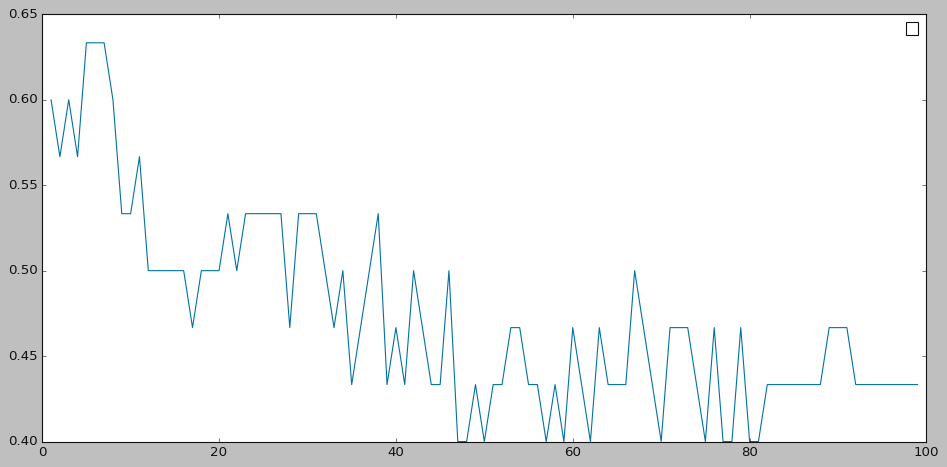

In [ ]:
# ada_model & Not Scaled & Best n_estimators
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

test_error = []
for n in range(1,100):
    model = AdaBoostClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    test_preds = model.predict(X_test)
    test_error.append(1-accuracy_score(test_preds, y_test))
    
plt.figure(figsize=(12,6))
plt.plot(range(1,100), test_error)
plt.legend()
plt.tight_layout();

### Ada & Optimal Threshold

In [ ]:
# ada_model & Not Scaled & Optimal Threshold
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.metrics import accuracy_score

ada_model = AdaBoostClassifier(random_state=42)
ada_model.fit(X_train, y_train)

y_test_prd = ada_model.predict(X_test)
y_test_prd_prb = pd.Series(ada_model.predict_proba(X_test)[:,1])

y_train_prd_prb = ada_model.predict_proba(X_train)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

ada_scores = {"ada": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                      "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                      "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                      "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                      "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

ada_scr = pd.DataFrame(ada_scores, index=["acc","prc","rec","f1s", "roc"])
ada_scr

,ada
acc,0.70
prc,0.67
rec,0.71
f1s,0.69
roc,0.70


In [ ]:
# ada_model & MinMax Scaled & Optimal Threshold
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.metrics import accuracy_score

ada_model = AdaBoostClassifier(random_state=42)
ada_model.fit(X_train_mms, y_train)

y_test_prd = ada_model.predict(X_test_mms)
y_test_prd_prb = pd.Series(ada_model.predict_proba(X_test_mms)[:,1])

y_train_prd_prb = ada_model.predict_proba(X_train_mms)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

ada_scores = {"ada_mms": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                          "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                          "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                          "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                          "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

ada_mms_scr = pd.DataFrame(ada_scores, index=["acc","prc","rec","f1s", "roc"])
ada_mms_scr

,ada_mms
acc,0.70
prc,0.67
rec,0.71
f1s,0.69
roc,0.70


In [ ]:
# ada_model & Standard Scaled & Optimal Threshold
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.metrics import accuracy_score

ada_model = AdaBoostClassifier(random_state=42)
ada_model.fit(X_train_ss, y_train)

y_test_prd = ada_model.predict(X_test_ss)
y_test_prd_prb = pd.Series(ada_model.predict_proba(X_test_ss)[:,1])

y_train_prd_prb = ada_model.predict_proba(X_train_ss)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

ada_scores = {"ada_ss": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                         "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                         "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                         "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                         "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

ada_ss_scr = pd.DataFrame(ada_scores, index=["acc","prc","rec","f1s", "roc"])
ada_ss_scr

,ada_ss
acc,0.70
prc,0.67
rec,0.71
f1s,0.69
roc,0.70


In [ ]:
ada_def_scrs = pd.concat([ada_scr, ada_mms_scr, ada_ss_scr], axis=1)
ada_def_scrs

,ada,ada_mms,ada_ss
acc,0.70,0.70,0.70
prc,0.67,0.67,0.67
rec,0.71,0.71,0.71
f1s,0.69,0.69,0.69
roc,0.70,0.70,0.70


### Ada & GridSearchCV & Optimal Threshold

In [ ]:
# ada_model & Not Scaled & GridSearchCV & Optimal Threshold
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

ada_model = AdaBoostClassifier(random_state=42)
param_grid = {"n_estimators": [50, 60, 100],
              "learning_rate": [0.01, 0.1, 0.2, 0.5, 1.0]}
ada_grd = GridSearchCV(ada_model, param_grid, scoring = "accuracy", n_jobs = -1, verbose = 2)

ada_grd.fit(X_train, y_train)
y_test_prd = ada_grd.predict(X_test)
y_test_prd_prb = pd.Series(ada_grd.predict_proba(X_test)[:,1])

y_train_prd_prb = ada_grd.predict_proba(X_train)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

ada_scores = {"ada_grd": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                          "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                          "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                          "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                          "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

ada_scr = pd.DataFrame(ada_scores, index=["acc","prc","rec","f1s", "roc"])
print(ada_grd.best_params_)
ada_scr

Fitting 5 folds for each of 15 candidates, totalling 75 fits
{'learning_rate': 1.0, 'n_estimators': 100}


,ada_grd
acc,0.67
prc,0.67
rec,0.57
f1s,0.62
roc,0.66


In [ ]:
# ada_model & MinMax Scaled & GridSearchCV & Optimal Threshold
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

ada_model = AdaBoostClassifier(random_state=42)
param_grid = {"n_estimators": [50, 60, 100],
              "learning_rate": [0.01, 0.1, 0.2, 0.5, 1.0]}
ada_grd = GridSearchCV(ada_model, param_grid, scoring = "accuracy", n_jobs = -1, verbose = 2)

ada_grd.fit(X_train_mms, y_train)
y_test_prd = ada_grd.predict(X_test_mms)
y_test_prd_prb = pd.Series(ada_grd.predict_proba(X_test_mms)[:,1])

y_train_prd_prb = ada_grd.predict_proba(X_train_mms)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

ada_scores = {"ada_grd_mms": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                              "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                              "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                              "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                              "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

ada_mms_scr = pd.DataFrame(ada_scores, index=["acc","prc","rec","f1s", "roc"])
print(ada_grd.best_params_)
ada_mms_scr

Fitting 5 folds for each of 15 candidates, totalling 75 fits
{'learning_rate': 1.0, 'n_estimators': 100}


,ada_grd_mms
acc,0.67
prc,0.67
rec,0.57
f1s,0.62
roc,0.66


In [ ]:
# ada_model & Standard Scaled & Optimal Threshold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

ada_model = AdaBoostClassifier(random_state=42)
param_grid = {"n_estimators": [50, 60, 100],
              "learning_rate": [0.01, 0.1, 0.2, 0.5, 1.0]}
ada_grd = GridSearchCV(ada_model, param_grid, scoring = "accuracy", n_jobs = -1, verbose = 2)

ada_grd.fit(X_train_ss, y_train)
y_test_prd = ada_grd.predict(X_test_ss)
y_test_prd_prb = pd.Series(ada_grd.predict_proba(X_test_ss)[:,1])

y_train_prd_prb = ada_grd.predict_proba(X_train_ss)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

ada_scores = {"ada_grd_ss": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                             "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                             "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                             "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                             "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

ada_ss_scr = pd.DataFrame(ada_scores, index=["acc","prc","rec","f1s", "roc"])
print(ada_grd.best_params_)
ada_ss_scr

Fitting 5 folds for each of 15 candidates, totalling 75 fits
{'learning_rate': 1.0, 'n_estimators': 100}


,ada_grd_ss
acc,0.67
prc,0.67
rec,0.57
f1s,0.62
roc,0.66


In [ ]:
ada_grd_scrs = pd.concat([ada_scr, ada_mms_scr, ada_ss_scr], axis=1)
ada_grd_scrs

,ada_grd,ada_grd_mms,ada_grd_ss
acc,0.67,0.67,0.67
prc,0.67,0.67,0.67
rec,0.57,0.57,0.57
f1s,0.62,0.62,0.62
roc,0.66,0.66,0.66


In [ ]:
ada_mid_scrs = pd.concat([ada_def_scrs, ada_grd_scrs], axis=1)
ada_mid_scrs.columns = ["ada","ada_grd","ada_mms","ada_grd_mms","ada_ss","ada_grd_ss"]
ada_mid_scrs

,ada,ada_grd,ada_mms,ada_grd_mms,ada_ss,ada_grd_ss
acc,0.70,0.70,0.70,0.67,0.67,0.67
prc,0.67,0.67,0.67,0.67,0.67,0.67
rec,0.71,0.71,0.71,0.57,0.57,0.57
f1s,0.69,0.69,0.69,0.62,0.62,0.62
roc,0.70,0.70,0.70,0.66,0.66,0.66


### Ada & CV

In [ ]:
# ada_model & Not Scaled & CV
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.model_selection import cross_validate

ada_model = AdaBoostClassifier(random_state=42)
scores = cross_validate(ada_model,
                        X_train,
                        y_train,
                        scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                        cv = 10)
ada_cv_scr = pd.DataFrame(scores, index = range(1, 11))
ada_cv_scr = ada_cv_scr.mean()[2:]
ada_cv_scr

test_accuracy    0.66
test_precision   0.73
test_recall      0.72
test_f1          0.72
test_roc_auc     0.72
dtype: float64

In [ ]:
# ada_model & MinMax Scaled & CV
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.model_selection import cross_validate

ada_model = AdaBoostClassifier(random_state=42)
scores = cross_validate(ada_model,
                        X_train_mms,
                        y_train,
                        scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                        cv = 10)
ada_mms_cv_scr = pd.DataFrame(scores, index = range(1, 11))
ada_mms_cv_scr = ada_mms_cv_scr.mean()[2:]
ada_mms_cv_scr

test_accuracy    0.66
test_precision   0.73
test_recall      0.72
test_f1          0.72
test_roc_auc     0.72
dtype: float64

In [ ]:
# ada_model & Standard Scaled & CV
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.model_selection import cross_validate

ada_model = AdaBoostClassifier(random_state=42)
scores = cross_validate(ada_model,
                        X_train_ss,
                        y_train,
                        scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                        cv = 10)
ada_ss_cv_scr = pd.DataFrame(scores, index = range(1, 11))
ada_ss_cv_scr = ada_ss_cv_scr.mean()[2:]
ada_ss_cv_scr

test_accuracy    0.66
test_precision   0.73
test_recall      0.72
test_f1          0.72
test_roc_auc     0.72
dtype: float64

In [ ]:
ada_cv_scrs = pd.concat([ada_cv_scr, ada_mms_cv_scr, ada_ss_cv_scr], axis=1)
ada_cv_scrs.rename(columns={0:"ada_cv",
                            1:"ada_cv_mms",
                            2:"ada_cv_ss"},
                   index={"test_accuracy":"acc",
                         "test_precision":"prc",
                         "test_recall":"rec",
                         "test_f1":"f1s",
                         "test_roc_auc":"roc"},
                   inplace=True)
ada_cv_scrs

,ada_cv,ada_cv_mms,ada_cv_ss
acc,0.66,0.66,0.66
prc,0.73,0.73,0.73
rec,0.72,0.72,0.72
f1s,0.72,0.72,0.72
roc,0.72,0.72,0.72


In [ ]:
ada_cum_scrs = pd.concat([ada_def_scrs, ada_grd_scrs, ada_cv_scrs], axis=1)
ada_cum_scrs.columns = ["ada","ada_grd","ada_cv","ada_mms","ada_grd_mms","ada_cv_mms","ada_ss","ada_grd_ss","ada_cv_ss"]
ada_cum_scrs

,ada,ada_grd,ada_cv,ada_mms,ada_grd_mms,ada_cv_mms,ada_ss,ada_grd_ss,ada_cv_ss
acc,0.70,0.70,0.70,0.67,0.67,0.67,0.66,0.66,0.66
prc,0.67,0.67,0.67,0.67,0.67,0.67,0.73,0.73,0.73
rec,0.71,0.71,0.71,0.57,0.57,0.57,0.72,0.72,0.72
f1s,0.69,0.69,0.69,0.62,0.62,0.62,0.72,0.72,0.72
roc,0.70,0.70,0.70,0.66,0.66,0.66,0.72,0.72,0.72


### Ada Feature Importances

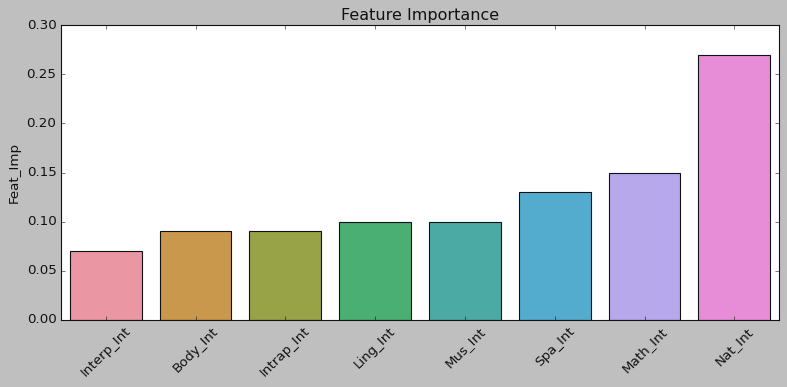

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_validate
model = AdaBoostClassifier(n_estimators=100, learning_rate=1.0, random_state=42)
model.fit(X_train, y_train)
Feat_Imp = pd.DataFrame(index=X.columns,
                        data = model.feature_importances_, 
                        columns = ["Feat_Imp"]).sort_values("Feat_Imp")
plt.figure(figsize=(10,5))
sns.barplot(x = Feat_Imp.index, y = 'Feat_Imp', data = Feat_Imp)
plt.title("Feature Importance")
plt.xticks(rotation = 45)
plt.tight_layout();

### Ada Visualize Tree

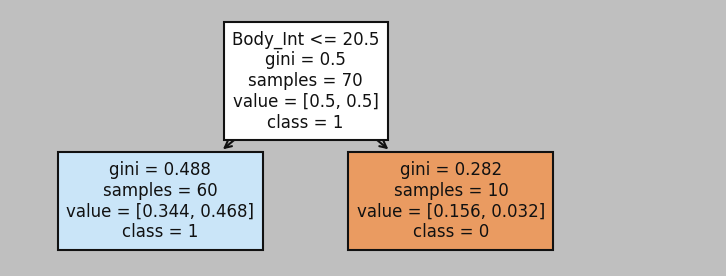

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import plot_tree

model = AdaBoostClassifier(n_estimators=100, learning_rate=1.0, random_state=42)
model.fit(X_train, y_train)

plt.figure(figsize = (5,2), dpi = 150)
plot_tree(model.estimators_[1],
          filled = True,
          feature_names = X.columns,
          class_names = ["0", "1"],
          fontsize = 8)
plt.tight_layout();

## GradientBoosting

### Gradient & Best n_estimators

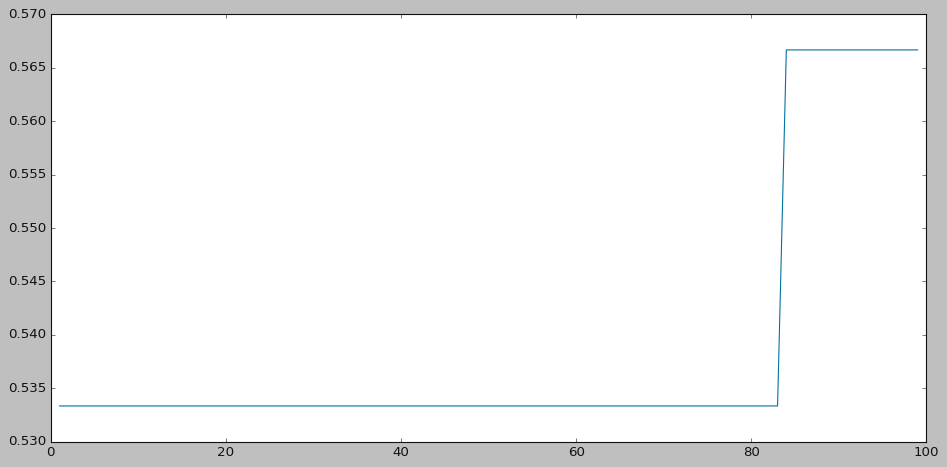

In [ ]:
# grd_model & Not Scaled & Best n_estimators
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

test_error = []
for n in range(1,100):
    model = GradientBoostingClassifier(learning_rate = 0.005,
                                       max_depth = 3,
                                       max_features = 2,
                                       n_estimators = n,
                                       subsample = 1,
                                       random_state=42)
    model.fit(X_train, y_train)
    test_preds = model.predict(X_test)
    test_error.append(1-accuracy_score(test_preds, y_test))
    
plt.figure(figsize=(12,6))
plt.plot(range(1,100), test_error)
plt.tight_layout();

### Gradient & Optimal Threshold

In [ ]:
# grd_model & Not Scaled & Optimal Threshold
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.metrics import accuracy_score

grd_model = GradientBoostingClassifier(random_state=42)
grd_model.fit(X_train, y_train)

y_test_prd = grd_model.predict(X_test)
y_test_prd_prb = pd.Series(grd_model.predict_proba(X_test)[:,1])

y_train_prd_prb = grd_model.predict_proba(X_train)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

grd_scores = {"grd": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                      "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                      "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                      "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                      "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

grd_scr = pd.DataFrame(grd_scores, index=["acc","prc","rec","f1s", "roc"])
grd_scr

,grd
acc,0.60
prc,0.58
rec,0.50
f1s,0.54
roc,0.59


In [ ]:
# grd_model & MinMax Scaled & Optimal Threshold
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.metrics import accuracy_score

grd_model = GradientBoostingClassifier(random_state=42)
grd_model.fit(X_train_mms, y_train)

y_test_prd = grd_model.predict(X_test_mms)
y_test_prd_prb = pd.Series(grd_model.predict_proba(X_test_mms)[:,1])

y_train_prd_prb = grd_model.predict_proba(X_train_mms)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

grd_scores = {"grd_mms": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                          "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                          "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                          "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                          "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

grd_mms_scr = pd.DataFrame(grd_scores, index=["acc","prc","rec","f1s", "roc"])
grd_mms_scr

,grd_mms
acc,0.60
prc,0.58
rec,0.50
f1s,0.54
roc,0.59


In [ ]:
# grd_model & Standard Scaled & Optimal Threshold
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.metrics import accuracy_score

grd_model = GradientBoostingClassifier(random_state=42)
grd_model.fit(X_train_ss, y_train)

y_test_prd = grd_model.predict(X_test_ss)
y_test_prd_prb = pd.Series(grd_model.predict_proba(X_test_ss)[:,1])

y_train_prd_prb = grd_model.predict_proba(X_train_ss)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

grd_scores = {"grd_ss": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                         "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                         "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                         "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                         "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

grd_ss_scr = pd.DataFrame(grd_scores, index=["acc","prc","rec","f1s", "roc"])
grd_ss_scr

,grd_ss
acc,0.60
prc,0.58
rec,0.50
f1s,0.54
roc,0.59


In [ ]:
grd_def_scrs = pd.concat([grd_scr, grd_mms_scr, grd_ss_scr], axis=1)
grd_def_scrs

,grd,grd_mms,grd_ss
acc,0.60,0.60,0.60
prc,0.58,0.58,0.58
rec,0.50,0.50,0.50
f1s,0.54,0.54,0.54
roc,0.59,0.59,0.59


### Gradient & GridSearchCV & Optimal Threshold

In [ ]:
# grd_model & Not Scaled & GridSearchCV & Optimal Threshold
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

grd_model = GradientBoostingClassifier(random_state=42)
param_grid = {"learning_rate":[0.003, 0.005, 0.006],
              "n_estimators":[200, 300, 400],
              "subsample":[0.5, 1, 2],
              "max_depth":[2, 3, 4],
              "max_features":[None, 2, 3]}
grd_grd = GridSearchCV(grd_model, param_grid, scoring = "accuracy", n_jobs = -1, verbose = 2)

grd_grd.fit(X_train, y_train)
y_test_prd = grd_grd.predict(X_test)
y_test_prd_prb = pd.Series(grd_grd.predict_proba(X_test)[:,1])

y_train_prd_prb = grd_grd.predict_proba(X_train)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

grd_scores = {"grd_grd": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                          "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                          "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                          "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                          "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

grd_scr = pd.DataFrame(grd_scores, index=["acc","prc","rec","f1s", "roc"])
print(grd_grd.best_params_)
grd_scr

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
{'learning_rate': 0.005, 'max_depth': 3, 'max_features': 2, 'n_estimators': 300, 'subsample': 1}


,grd_grd
acc,0.50
prc,0.47
rec,0.57
f1s,0.52
roc,0.50


In [ ]:
# grd_model & MinMax Scaled & GridSearchCV & Optimal Threshold
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

grd_model = GradientBoostingClassifier(random_state=42)
param_grid = {"learning_rate":[0.003, 0.005, 0.006],
              "n_estimators":[200, 300, 400],
              "subsample":[0.5, 1, 2],
              "max_depth":[2, 3, 4],
              "max_features":[None, 2, 3]}
grd_grd = GridSearchCV(grd_model, param_grid, scoring = "accuracy", n_jobs = -1, verbose = 2)

grd_grd.fit(X_train_mms, y_train)
y_test_prd = grd_grd.predict(X_test_mms)
y_test_prd_prb = pd.Series(grd_grd.predict_proba(X_test_mms)[:,1])

y_train_prd_prb = grd_grd.predict_proba(X_train_mms)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

grd_scores = {"grd_grd_mms": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                              "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                              "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                              "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                              "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

grd_mms_scr = pd.DataFrame(grd_scores, index=["acc","prc","rec","f1s", "roc"])
print(grd_grd.best_params_)
grd_mms_scr

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
{'learning_rate': 0.005, 'max_depth': 2, 'max_features': 2, 'n_estimators': 400, 'subsample': 1}


,grd_grd_mms
acc,0.50
prc,0.47
rec,0.57
f1s,0.52
roc,0.50


In [ ]:
# grd_model & Standard Scaled & Optimal Threshold
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

grd_model = GradientBoostingClassifier(random_state=42)
param_grid = {"learning_rate":[0.003, 0.005, 0.006],
              "n_estimators":[200, 300, 400],
              "subsample":[0.5, 1, 2],
              "max_depth":[2, 3, 4],
              "max_features":[None, 2, 3]}
grd_grd = GridSearchCV(grd_model, param_grid, scoring = "accuracy", n_jobs = -1, verbose = 2)

grd_grd.fit(X_train_ss, y_train)
y_test_prd = grd_grd.predict(X_test_ss)
y_test_prd_prb = pd.Series(grd_grd.predict_proba(X_test_ss)[:,1])

y_train_prd_prb = grd_grd.predict_proba(X_train_ss)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

grd_scores = {"grd_grd_ss": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                             "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                             "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                             "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                             "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

grd_ss_scr = pd.DataFrame(grd_scores, index=["acc","prc","rec","f1s", "roc"])
print(grd_grd.best_params_)
grd_ss_scr

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
{'learning_rate': 0.005, 'max_depth': 2, 'max_features': 2, 'n_estimators': 400, 'subsample': 1}


,grd_grd_ss
acc,0.50
prc,0.47
rec,0.57
f1s,0.52
roc,0.50


In [ ]:
grd_grd_scrs = pd.concat([grd_scr, grd_mms_scr, grd_ss_scr], axis=1)
grd_grd_scrs

,grd_grd,grd_grd_mms,grd_grd_ss
acc,0.50,0.50,0.50
prc,0.47,0.47,0.47
rec,0.57,0.57,0.57
f1s,0.52,0.52,0.52
roc,0.50,0.50,0.50


In [ ]:
grd_mid_scrs = pd.concat([grd_def_scrs, grd_grd_scrs], axis=1)
grd_mid_scrs.columns = ["grd","grd_grd","grd_mms","grd_grd_mms","grd_ss","grd_grd_ss"]
grd_mid_scrs

,grd,grd_grd,grd_mms,grd_grd_mms,grd_ss,grd_grd_ss
acc,0.60,0.60,0.60,0.50,0.50,0.50
prc,0.58,0.58,0.58,0.47,0.47,0.47
rec,0.50,0.50,0.50,0.57,0.57,0.57
f1s,0.54,0.54,0.54,0.52,0.52,0.52
roc,0.59,0.59,0.59,0.50,0.50,0.50


### Gradient & CV

In [ ]:
# grd_model & Not Scaled & CV
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.model_selection import cross_validate

grd_model = GradientBoostingClassifier(random_state=42)
scores = cross_validate(grd_model,
                        X_train,
                        y_train,
                        scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                        cv = 10)
grd_cv_scr = pd.DataFrame(scores, index = range(1, 11))
grd_cv_scr = grd_cv_scr.mean()[2:]
grd_cv_scr

test_accuracy    0.69
test_precision   0.74
test_recall      0.79
test_f1          0.75
test_roc_auc     0.71
dtype: float64

In [ ]:
# grd_model & MinMax Scaled & CV
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.model_selection import cross_validate

grd_model = GradientBoostingClassifier(random_state=42)
scores = cross_validate(grd_model,
                        X_train_mms,
                        y_train,
                        scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                        cv = 10)
grd_mms_cv_scr = pd.DataFrame(scores, index = range(1, 11))
grd_mms_cv_scr = grd_mms_cv_scr.mean()[2:]
grd_mms_cv_scr

test_accuracy    0.69
test_precision   0.74
test_recall      0.79
test_f1          0.75
test_roc_auc     0.71
dtype: float64

In [ ]:
# grd_model & Standard Scaled & CV
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.model_selection import cross_validate

grd_model = GradientBoostingClassifier(random_state=42)
scores = cross_validate(grd_model,
                        X_train_ss,
                        y_train,
                        scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                        cv = 10)
grd_ss_cv_scr = pd.DataFrame(scores, index = range(1, 11))
grd_ss_cv_scr = grd_ss_cv_scr.mean()[2:]
grd_ss_cv_scr

test_accuracy    0.69
test_precision   0.74
test_recall      0.79
test_f1          0.75
test_roc_auc     0.70
dtype: float64

In [ ]:
grd_cv_scrs = pd.concat([grd_cv_scr, grd_mms_cv_scr, grd_ss_cv_scr], axis=1)
grd_cv_scrs.rename(columns={0:"grd_cv",
                            1:"grd_cv_mms",
                            2:"grd_cv_ss"},
                   index={"test_accuracy":"acc",
                         "test_precision":"prc",
                         "test_recall":"rec",
                         "test_f1":"f1s",
                         "test_roc_auc":"roc"},
                   inplace=True)
grd_cv_scrs

,grd_cv,grd_cv_mms,grd_cv_ss
acc,0.69,0.69,0.69
prc,0.74,0.74,0.74
rec,0.79,0.79,0.79
f1s,0.75,0.75,0.75
roc,0.71,0.71,0.70


In [ ]:
grd_cum_scrs = pd.concat([grd_def_scrs, grd_grd_scrs, grd_cv_scrs], axis=1)
grd_cum_scrs.columns = ["grd","grd_grd","grd_cv","grd_mms","grd_grd_mms","grd_cv_mms","grd_ss","grd_grd_ss","grd_cv_ss"]
grd_cum_scrs

,grd,grd_grd,grd_cv,grd_mms,grd_grd_mms,grd_cv_mms,grd_ss,grd_grd_ss,grd_cv_ss
acc,0.60,0.60,0.60,0.50,0.50,0.50,0.69,0.69,0.69
prc,0.58,0.58,0.58,0.47,0.47,0.47,0.74,0.74,0.74
rec,0.50,0.50,0.50,0.57,0.57,0.57,0.79,0.79,0.79
f1s,0.54,0.54,0.54,0.52,0.52,0.52,0.75,0.75,0.75
roc,0.59,0.59,0.59,0.50,0.50,0.50,0.71,0.71,0.70


### Gradient Feature Importances

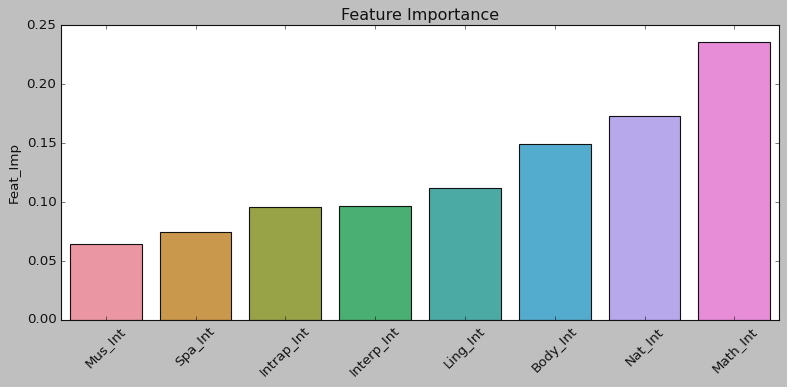

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_validate
model = GradientBoostingClassifier(learning_rate = 0.005,
                                   max_depth = 3,
                                   max_features = 2,
                                   n_estimators = 300,
                                   subsample = 1,
                                   random_state=42)
model.fit(X_train, y_train)
Feat_Imp = pd.DataFrame(index=X.columns,
                        data = model.feature_importances_, 
                        columns = ["Feat_Imp"]).sort_values("Feat_Imp")
plt.figure(figsize=(10,5))
sns.barplot(x = Feat_Imp.index, y = 'Feat_Imp', data = Feat_Imp)
plt.title("Feature Importance")
plt.xticks(rotation = 45)
plt.tight_layout();

## XGB

### XGB & Best n_estimators

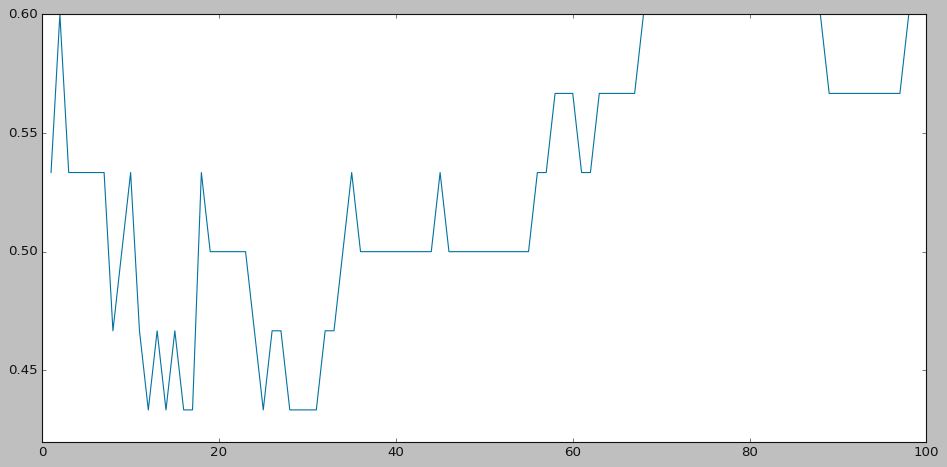

In [ ]:
# xgb_model & Not Scaled & Best n_estimators
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

test_error = []
for n in range(1,100):
    model = XGBClassifier(n_estimators = n,
                          learning_rate = 0.1,
                          max_depth = 2,
                          colsample_bytree = 0.2,
                          subsample = 1)
    model.fit(X_train, y_train)
    test_preds = model.predict(X_test)
    test_error.append(1-accuracy_score(test_preds, y_test))
    
plt.figure(figsize=(12,6))
plt.plot(range(1,100), test_error)
plt.tight_layout();

### XGB & Optimal Threshold

In [ ]:
# xgb_model & Not Scaled & Optimal Threshold
from xgboost import XGBClassifier 
from sklearn.metrics import accuracy_score

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

y_test_prd = xgb_model.predict(X_test)
y_test_prd_prb = pd.Series(xgb_model.predict_proba(X_test)[:,1])

y_train_prd_prb = xgb_model.predict_proba(X_train)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

xgb_scores = {"xgb": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                      "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                      "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                      "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                      "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

xgb_scr = pd.DataFrame(xgb_scores, index=["acc","prc","rec","f1s", "roc"])
xgb_scr

,xgb
acc,0.43
prc,0.40
rec,0.43
f1s,0.41
roc,0.43


In [ ]:
# xgb_model & MinMax Scaled & Optimal Threshold
from xgboost import XGBClassifier 
from sklearn.metrics import accuracy_score

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_mms, y_train)

y_test_prd = xgb_model.predict(X_test_mms)
y_test_prd_prb = pd.Series(xgb_model.predict_proba(X_test_mms)[:,1])

y_train_prd_prb = xgb_model.predict_proba(X_train_mms)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

xgb_scores = {"xgb_mms": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                          "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                          "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                          "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                          "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

xgb_mms_scr = pd.DataFrame(xgb_scores, index=["acc","prc","rec","f1s", "roc"])
xgb_mms_scr

,xgb_mms
acc,0.43
prc,0.40
rec,0.43
f1s,0.41
roc,0.43


In [ ]:
# xgb_model & Standard Scaled & Optimal Threshold
from xgboost import XGBClassifier 
from sklearn.metrics import accuracy_score

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_ss, y_train)

y_test_prd = xgb_model.predict(X_test_ss)
y_test_prd_prb = pd.Series(xgb_model.predict_proba(X_test_ss)[:,1])

y_train_prd_prb = xgb_model.predict_proba(X_train_ss)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

xgb_scores = {"xgb_ss": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                         "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                         "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                         "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                         "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

xgb_ss_scr = pd.DataFrame(xgb_scores, index=["acc","prc","rec","f1s", "roc"])
xgb_ss_scr

,xgb_ss
acc,0.43
prc,0.40
rec,0.43
f1s,0.41
roc,0.43


In [ ]:
xgb_def_scrs = pd.concat([xgb_scr, xgb_mms_scr, xgb_ss_scr], axis=1)
xgb_def_scrs

,xgb,xgb_mms,xgb_ss
acc,0.43,0.43,0.43
prc,0.40,0.40,0.40
rec,0.43,0.43,0.43
f1s,0.41,0.41,0.41
roc,0.43,0.43,0.43


### XGB & GridSearchCV & Optimal Threshold

In [ ]:
# xgb_model & Not Scaled & GridSearchCV & Optimal Threshold
from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

xgb_model = XGBClassifier(random_state=42)
param_grid = {"max_depth":[1,2,3],
              "subsample":[0.5, 1],
              "colsample_bytree":[0.2, 0.3],
              "learning_rate": [0.005,0.1,0.15],
              "n_estimators":[100,200,300]}
xgb_grd = GridSearchCV(xgb_model, param_grid, scoring = "accuracy", n_jobs = -1, verbose = 2)

xgb_grd.fit(X_train, y_train)
y_test_prd = xgb_grd.predict(X_test)
y_test_prd_prb = pd.Series(xgb_grd.predict_proba(X_test)[:,1])

y_train_prd_prb = xgb_grd.predict_proba(X_train)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

xgb_scores = {"xgb_grd": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                          "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                          "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                          "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                          "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

xgb_scr = pd.DataFrame(xgb_scores, index=["acc","prc","rec","f1s", "roc"])
print(xgb_grd.best_params_)
xgb_scr

Fitting 5 folds for each of 108 candidates, totalling 540 fits
{'colsample_bytree': 0.2, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100, 'subsample': 1}


,xgb_grd
acc,0.53
prc,0.50
rec,0.50
f1s,0.50
roc,0.53


In [ ]:
# xgb_model & MinMax Scaled & GridSearchCV & Optimal Threshold
from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

xgb_model = XGBClassifier(random_state=42)
param_grid = {"max_depth":[1,2,3],
              "subsample":[0.5, 1],
              "colsample_bytree":[0.2, 0.3],
              "learning_rate": [0.005,0.1,0.15],
              "n_estimators":[100,200,300]}
xgb_grd = GridSearchCV(xgb_model, param_grid, scoring = "accuracy", n_jobs = -1, verbose = 2)

xgb_grd.fit(X_train_mms, y_train)
y_test_prd = xgb_grd.predict(X_test_mms)
y_test_prd_prb = pd.Series(xgb_grd.predict_proba(X_test_mms)[:,1])

y_train_prd_prb = xgb_grd.predict_proba(X_train_mms)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

xgb_scores = {"xgb_grd_mms": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                              "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                              "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                              "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                              "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

xgb_mms_scr = pd.DataFrame(xgb_scores, index=["acc","prc","rec","f1s", "roc"])
print(xgb_grd.best_params_)
xgb_mms_scr

Fitting 5 folds for each of 108 candidates, totalling 540 fits
{'colsample_bytree': 0.2, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100, 'subsample': 1}


,xgb_grd_mms
acc,0.53
prc,0.50
rec,0.50
f1s,0.50
roc,0.53


In [ ]:
# xgb_model & Standard Scaled & Optimal Threshold
from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

xgb_model = XGBClassifier(random_state=42)
param_grid = {"max_depth":[1,2,3],
              "subsample":[0.5, 1],
              "colsample_bytree":[0.2, 0.3],
              "learning_rate": [0.005,0.1,0.15],
              "n_estimators":[100,200,300]}
xgb_grd = GridSearchCV(xgb_model, param_grid, scoring = "accuracy", n_jobs = -1, verbose = 2)

xgb_grd.fit(X_train_ss, y_train)
y_test_prd = xgb_grd.predict(X_test_ss)
y_test_prd_prb = pd.Series(xgb_grd.predict_proba(X_test_ss)[:,1])

y_train_prd_prb = xgb_grd.predict_proba(X_train_ss)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

xgb_scores = {"xgb_grd_ss": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                             "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                             "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                             "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                             "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

xgb_ss_scr = pd.DataFrame(xgb_scores, index=["acc","prc","rec","f1s", "roc"])
print(xgb_grd.best_params_)
xgb_ss_scr

Fitting 5 folds for each of 108 candidates, totalling 540 fits
{'colsample_bytree': 0.2, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100, 'subsample': 1}


,xgb_grd_ss
acc,0.53
prc,0.50
rec,0.50
f1s,0.50
roc,0.53


In [ ]:
xgb_grd_scrs = pd.concat([xgb_scr, xgb_mms_scr, xgb_ss_scr], axis=1)
xgb_grd_scrs

,xgb_grd,xgb_grd_mms,xgb_grd_ss
acc,0.53,0.53,0.53
prc,0.50,0.50,0.50
rec,0.50,0.50,0.50
f1s,0.50,0.50,0.50
roc,0.53,0.53,0.53


In [ ]:
xgb_mid_scrs = pd.concat([xgb_def_scrs, xgb_grd_scrs], axis=1)
xgb_mid_scrs.columns = ["xgb","xgb_grd","xgb_mms","xgb_grd_mms","xgb_ss","xgb_grd_ss"]
xgb_mid_scrs

,xgb,xgb_grd,xgb_mms,xgb_grd_mms,xgb_ss,xgb_grd_ss
acc,0.43,0.43,0.43,0.53,0.53,0.53
prc,0.40,0.40,0.40,0.50,0.50,0.50
rec,0.43,0.43,0.43,0.50,0.50,0.50
f1s,0.41,0.41,0.41,0.50,0.50,0.50
roc,0.43,0.43,0.43,0.53,0.53,0.53


### XGB & CV

In [ ]:
# xgb_model & Not Scaled & CV
from xgboost import XGBClassifier 
from sklearn.model_selection import cross_validate

xgb_model = XGBClassifier(random_state=42)
scores = cross_validate(xgb_model,
                        X_train,
                        y_train,
                        scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                        cv = 10)
xgb_cv_scr = pd.DataFrame(scores, index = range(1, 11))
xgb_cv_scr = xgb_cv_scr.mean()[2:]
xgb_cv_scr

test_accuracy    0.60
test_precision   0.70
test_recall      0.67
test_f1          0.65
test_roc_auc     0.71
dtype: float64

In [ ]:
# xgb_model & MinMax Scaled & CV
from xgboost import XGBClassifier 
from sklearn.model_selection import cross_validate

xgb_model = XGBClassifier(random_state=42)
scores = cross_validate(xgb_model,
                        X_train_mms,
                        y_train,
                        scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                        cv = 10)
xgb_mms_cv_scr = pd.DataFrame(scores, index = range(1, 11))
xgb_mms_cv_scr = xgb_mms_cv_scr.mean()[2:]
xgb_mms_cv_scr

test_accuracy    0.60
test_precision   0.70
test_recall      0.67
test_f1          0.65
test_roc_auc     0.71
dtype: float64

In [ ]:
# xgb_model & Standard Scaled & CV
from xgboost import XGBClassifier 
from sklearn.model_selection import cross_validate

xgb_model = XGBClassifier(random_state=42)
scores = cross_validate(xgb_model,
                        X_train_ss,
                        y_train,
                        scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                        cv = 10)
xgb_ss_cv_scr = pd.DataFrame(scores, index = range(1, 11))
xgb_ss_cv_scr = xgb_ss_cv_scr.mean()[2:]
xgb_ss_cv_scr

test_accuracy    0.60
test_precision   0.70
test_recall      0.67
test_f1          0.65
test_roc_auc     0.71
dtype: float64

In [ ]:
xgb_cv_scrs = pd.concat([xgb_cv_scr, xgb_mms_cv_scr, xgb_ss_cv_scr], axis=1)
xgb_cv_scrs.rename(columns={0:"xgb_cv",
                            1:"xgb_cv_mms",
                            2:"xgb_cv_ss"},
                   index={"test_accuracy":"acc",
                         "test_precision":"prc",
                         "test_recall":"rec",
                         "test_f1":"f1s",
                         "test_roc_auc":"roc"},
                   inplace=True)
xgb_cv_scrs

,xgb_cv,xgb_cv_mms,xgb_cv_ss
acc,0.60,0.60,0.60
prc,0.70,0.70,0.70
rec,0.67,0.67,0.67
f1s,0.65,0.65,0.65
roc,0.71,0.71,0.71


In [ ]:
xgb_cum_scrs = pd.concat([xgb_def_scrs, xgb_grd_scrs, xgb_cv_scrs], axis=1)
xgb_cum_scrs.columns = ["xgb","xgb_grd","xgb_cv","xgb_mms","xgb_grd_mms","xgb_cv_mms","xgb_ss","xgb_grd_ss","xgb_cv_ss"]
xgb_cum_scrs

,xgb,xgb_grd,xgb_cv,xgb_mms,xgb_grd_mms,xgb_cv_mms,xgb_ss,xgb_grd_ss,xgb_cv_ss
acc,0.43,0.43,0.43,0.53,0.53,0.53,0.60,0.60,0.60
prc,0.40,0.40,0.40,0.50,0.50,0.50,0.70,0.70,0.70
rec,0.43,0.43,0.43,0.50,0.50,0.50,0.67,0.67,0.67
f1s,0.41,0.41,0.41,0.50,0.50,0.50,0.65,0.65,0.65
roc,0.43,0.43,0.43,0.53,0.53,0.53,0.71,0.71,0.71


### XGB Feature Importances

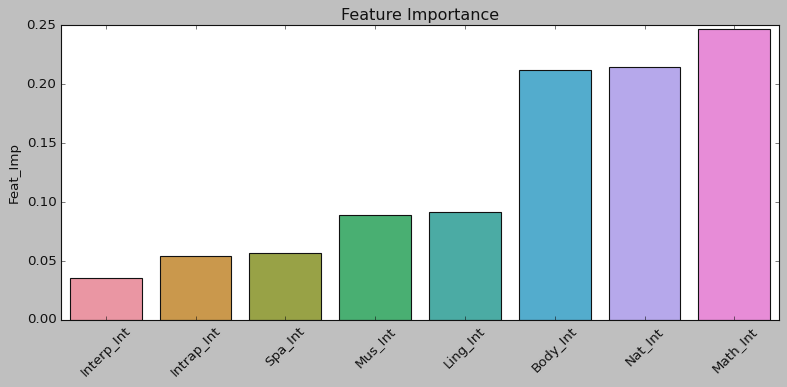

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_validate
model = XGBClassifier(colsample_bytree = 0.2,
                      learning_rate = 0.1,
                      max_depth = 2,
                      n_estimators = 100,
                      subsample = 1,
                      random_state=42)
model.fit(X_train, y_train)
Feat_Imp = pd.DataFrame(index=X.columns,
                        data = model.feature_importances_, 
                        columns = ["Feat_Imp"]).sort_values("Feat_Imp")
plt.figure(figsize=(10,5))
sns.barplot(x = Feat_Imp.index, y = 'Feat_Imp', data = Feat_Imp)
plt.title("Feature Importance")
plt.xticks(rotation = 45)
plt.tight_layout();

## LGBM

### LGBM & Best n_estimators

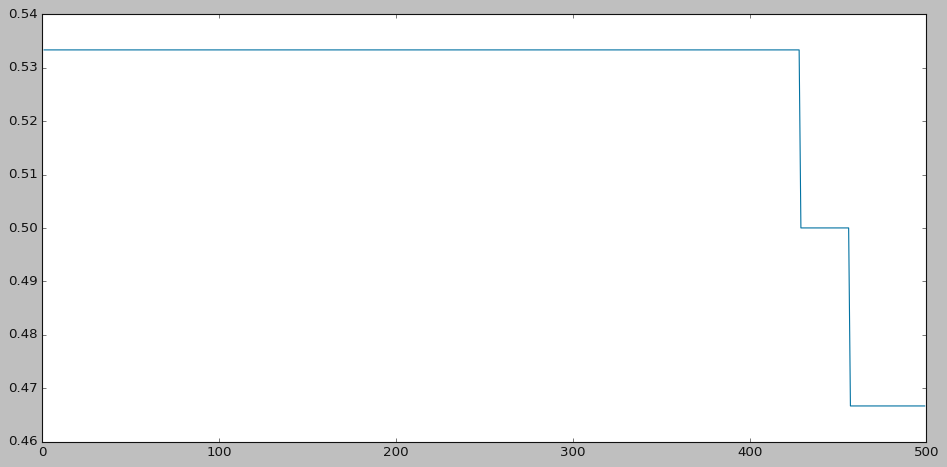

In [ ]:
# lgb_model & Not Scaled & Best n_estimators
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

test_error = []
for n in range(1,500):
    model = LGBMClassifier(n_estimators = n,
                           learning_rate = 0.005,
                           max_depth = 1,
                           colsample_bytree = 0.2,
                           subsample = 0.5)
    model.fit(X_train, y_train)
    test_preds = model.predict(X_test)
    test_error.append(1-accuracy_score(test_preds, y_test))
    
plt.figure(figsize=(12,6))
plt.plot(range(1,500), test_error)
plt.tight_layout();

### LGBM & Optimal Threshold

In [ ]:
# lgb_model & Not Scaled & Optimal Threshold
from lightgbm import LGBMClassifier 
from sklearn.metrics import accuracy_score

lgb_model = LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

y_test_prd = lgb_model.predict(X_test)
y_test_prd_prb = pd.Series(lgb_model.predict_proba(X_test)[:,1])

y_train_prd_prb = lgb_model.predict_proba(X_train)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

lgb_scores = {"lgb": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                      "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                      "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                      "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                      "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

lgb_scr = pd.DataFrame(lgb_scores, index=["acc","prc","rec","f1s", "roc"])
lgb_scr

,lgb
acc,0.53
prc,0.50
rec,0.79
f1s,0.61
roc,0.55


In [ ]:
# lgb_model & MinMax Scaled & Optimal Threshold
from lightgbm import LGBMClassifier 
from sklearn.metrics import accuracy_score

lgb_model = LGBMClassifier(random_state=42)
lgb_model.fit(X_train_mms, y_train)

y_test_prd = lgb_model.predict(X_test_mms)
y_test_prd_prb = pd.Series(lgb_model.predict_proba(X_test_mms)[:,1])

y_train_prd_prb = lgb_model.predict_proba(X_train_mms)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

lgb_scores = {"lgb_mms": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                            "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                            "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                            "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                            "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

lgb_mms_scr = pd.DataFrame(lgb_scores, index=["acc","prc","rec","f1s", "roc"])
lgb_mms_scr

,lgb_mms
acc,0.53
prc,0.50
rec,0.79
f1s,0.61
roc,0.55


In [ ]:
# lgb_model & Standard Scaled & Optimal Threshold
from lightgbm import LGBMClassifier 
from sklearn.metrics import accuracy_score

lgb_model = LGBMClassifier(random_state=42)
lgb_model.fit(X_train_ss, y_train)

y_test_prd = lgb_model.predict(X_test_ss)
y_test_prd_prb = pd.Series(lgb_model.predict_proba(X_test_ss)[:,1])

y_train_prd_prb = lgb_model.predict_proba(X_train_ss)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

lgb_scores = {"lgb_ss": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                         "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                         "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                         "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                         "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

lgb_ss_scr = pd.DataFrame(lgb_scores, index=["acc","prc","rec","f1s", "roc"])
lgb_ss_scr

,lgb_ss
acc,0.53
prc,0.50
rec,0.79
f1s,0.61
roc,0.55


In [ ]:
lgb_def_scrs = pd.concat([lgb_scr, lgb_mms_scr, lgb_ss_scr], axis=1)
lgb_def_scrs

,lgb,lgb_mms,lgb_ss
acc,0.53,0.53,0.53
prc,0.50,0.50,0.50
rec,0.79,0.79,0.79
f1s,0.61,0.61,0.61
roc,0.55,0.55,0.55


### LGBM & GridSearchCV & Optimal Threshold

In [ ]:
# lgb_model & Not Scaled & GridSearchCV & Optimal Threshold
from lightgbm import LGBMClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

lgb_model = LGBMClassifier(random_state=42)
param_grid = {"max_depth":[1,2,3],
              "subsample":[0.5, 1],
              "colsample_bytree":[0.2, 0.3],
              "learning_rate": [0.005,0.1,0.15],
              "n_estimators":[100,200,300]}
lgb_grd = GridSearchCV(lgb_model, param_grid, scoring = "accuracy", n_jobs = -1, verbose = 2)

lgb_grd.fit(X_train, y_train)
y_test_prd = lgb_grd.predict(X_test)
y_test_prd_prb = pd.Series(lgb_grd.predict_proba(X_test)[:,1])

y_train_prd_prb = lgb_grd.predict_proba(X_train)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

lgb_scores = {"lgb_grd": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                          "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                          "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                          "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                          "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

lgb_scr = pd.DataFrame(lgb_scores, index=["acc","prc","rec","f1s", "roc"])
print(lgb_grd.best_params_)
lgb_scr

Fitting 5 folds for each of 108 candidates, totalling 540 fits
{'colsample_bytree': 0.2, 'learning_rate': 0.005, 'max_depth': 1, 'n_estimators': 100, 'subsample': 0.5}


,lgb_grd
acc,0.43
prc,0.44
rec,0.79
f1s,0.56
roc,0.46


In [ ]:
# lgb_model & MinMax Scaled & GridSearchCV & Optimal Threshold
from lightgbm import LGBMClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

lgb_model = LGBMClassifier(random_state=42)
param_grid = {"max_depth":[1,2,3],
              "subsample":[0.5, 1],
              "colsample_bytree":[0.2, 0.3],
              "learning_rate": [0.005,0.1,0.15],
              "n_estimators":[100,200,300]}
lgb_grd = GridSearchCV(lgb_model, param_grid, scoring = "accuracy", n_jobs = -1, verbose = 2)

lgb_grd.fit(X_train_mms, y_train)
y_test_prd = lgb_grd.predict(X_test_mms)
y_test_prd_prb = pd.Series(lgb_grd.predict_proba(X_test_mms)[:,1])

y_train_prd_prb = lgb_grd.predict_proba(X_train_mms)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

lgb_scores = {"lgb_grd_mms": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                              "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                              "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                              "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                              "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

lgb_mms_scr = pd.DataFrame(lgb_scores, index=["acc","prc","rec","f1s", "roc"])
print(lgb_grd.best_params_)
lgb_mms_scr

Fitting 5 folds for each of 108 candidates, totalling 540 fits
{'colsample_bytree': 0.2, 'learning_rate': 0.005, 'max_depth': 1, 'n_estimators': 100, 'subsample': 0.5}


,lgb_grd_mms
acc,0.43
prc,0.44
rec,0.79
f1s,0.56
roc,0.46


In [ ]:
# xgb_model & Standard Scaled & Optimal Threshold
from lightgbm import LGBMClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

lgb_model = LGBMClassifier(random_state=42)
param_grid = {"max_depth":[1,2,3],
              "subsample":[0.5, 1],
              "colsample_bytree":[0.2, 0.3],
              "learning_rate": [0.005,0.1,0.15],
              "n_estimators":[100,200,300]}
lgb_grd = GridSearchCV(lgb_model, param_grid, scoring = "accuracy", n_jobs = -1, verbose = 2)

lgb_grd.fit(X_train_ss, y_train)
y_test_prd = lgb_grd.predict(X_test_ss)
y_test_prd_prb = pd.Series(lgb_grd.predict_proba(X_test_ss)[:,1])

y_train_prd_prb = lgb_grd.predict_proba(X_train_ss)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

lgb_scores = {"lgb_grd_ss": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                             "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                             "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                             "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                             "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

lgb_ss_scr = pd.DataFrame(lgb_scores, index=["acc","prc","rec","f1s", "roc"])
print(lgb_grd.best_params_)
lgb_ss_scr

Fitting 5 folds for each of 108 candidates, totalling 540 fits
{'colsample_bytree': 0.2, 'learning_rate': 0.005, 'max_depth': 1, 'n_estimators': 100, 'subsample': 0.5}


,lgb_grd_ss
acc,0.43
prc,0.44
rec,0.79
f1s,0.56
roc,0.46


In [ ]:
lgb_grd_scrs = pd.concat([lgb_scr, lgb_mms_scr, lgb_ss_scr], axis=1)
lgb_grd_scrs

,lgb_grd,lgb_grd_mms,lgb_grd_ss
acc,0.43,0.43,0.43
prc,0.44,0.44,0.44
rec,0.79,0.79,0.79
f1s,0.56,0.56,0.56
roc,0.46,0.46,0.46


In [ ]:
lgb_mid_scrs = pd.concat([lgb_def_scrs, lgb_grd_scrs], axis=1)
lgb_mid_scrs.columns = ["lgb","lgb_grd","lgb_mms","lgb_grd_mms","lgb_ss","lgb_grd_ss"]
lgb_mid_scrs

,lgb,lgb_grd,lgb_mms,lgb_grd_mms,lgb_ss,lgb_grd_ss
acc,0.53,0.53,0.53,0.43,0.43,0.43
prc,0.50,0.50,0.50,0.44,0.44,0.44
rec,0.79,0.79,0.79,0.79,0.79,0.79
f1s,0.61,0.61,0.61,0.56,0.56,0.56
roc,0.55,0.55,0.55,0.46,0.46,0.46


### LGBM & CV

In [ ]:
# lgb_model & Not Scaled & CV
from lightgbm import LGBMClassifier 
from sklearn.model_selection import cross_validate

lgb_model = LGBMClassifier(random_state=42)
scores = cross_validate(lgb_model,
                        X_train,
                        y_train,
                        scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                        cv = 10)
lgb_cv_scr = pd.DataFrame(scores, index = range(1, 11))
lgb_cv_scr = lgb_cv_scr.mean()[2:]
lgb_cv_scr

test_accuracy    0.64
test_precision   0.67
test_recall      0.82
test_f1          0.73
test_roc_auc     0.55
dtype: float64

In [ ]:
# lgb_model & MinMax Scaled & CV
from lightgbm import LGBMClassifier 
from sklearn.model_selection import cross_validate

lgb_model = LGBMClassifier(random_state=42)
scores = cross_validate(lgb_model,
                        X_train_mms,
                        y_train,
                        scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                        cv = 10)
lgb_mms_cv_scr = pd.DataFrame(scores, index = range(1, 11))
lgb_mms_cv_scr = lgb_mms_cv_scr.mean()[2:]
lgb_mms_cv_scr

test_accuracy    0.64
test_precision   0.67
test_recall      0.82
test_f1          0.73
test_roc_auc     0.55
dtype: float64

In [ ]:
# lgb_model & Standard Scaled & CV
from lightgbm import LGBMClassifier 
from sklearn.model_selection import cross_validate

lgb_model = LGBMClassifier(random_state=42)
scores = cross_validate(xgb_model,
                        X_train_ss,
                        y_train,
                        scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                        cv = 10)
lgb_ss_cv_scr = pd.DataFrame(scores, index = range(1, 11))
lgb_ss_cv_scr = lgb_ss_cv_scr.mean()[2:]
lgb_ss_cv_scr

test_accuracy    0.60
test_precision   0.70
test_recall      0.67
test_f1          0.65
test_roc_auc     0.71
dtype: float64

In [ ]:
lgb_cv_scrs = pd.concat([lgb_cv_scr, lgb_mms_cv_scr, lgb_ss_cv_scr], axis=1)
lgb_cv_scrs.rename(columns={0:"lgb_cv",
                            1:"lgb_cv_mms",
                            2:"lgb_cv_ss"},
                   index={"test_accuracy":"acc",
                         "test_precision":"prc",
                         "test_recall":"rec",
                         "test_f1":"f1s",
                         "test_roc_auc":"roc"},
                   inplace=True)
lgb_cv_scrs

,lgb_cv,lgb_cv_mms,lgb_cv_ss
acc,0.64,0.64,0.60
prc,0.67,0.67,0.70
rec,0.82,0.82,0.67
f1s,0.73,0.73,0.65
roc,0.55,0.55,0.71


In [ ]:
lgb_cum_scrs = pd.concat([lgb_def_scrs, lgb_grd_scrs, lgb_cv_scrs], axis=1)
lgb_cum_scrs.columns = ["lgb","lgb_grd","lgb_cv","lgb_mms","lgb_grd_mms","lgb_cv_mms","lgb_ss","lgb_grd_ss","lgb_cv_ss"]
lgb_cum_scrs

,lgb,lgb_grd,lgb_cv,lgb_mms,lgb_grd_mms,lgb_cv_mms,lgb_ss,lgb_grd_ss,lgb_cv_ss
acc,0.53,0.53,0.53,0.43,0.43,0.43,0.64,0.64,0.60
prc,0.50,0.50,0.50,0.44,0.44,0.44,0.67,0.67,0.70
rec,0.79,0.79,0.79,0.79,0.79,0.79,0.82,0.82,0.67
f1s,0.61,0.61,0.61,0.56,0.56,0.56,0.73,0.73,0.65
roc,0.55,0.55,0.55,0.46,0.46,0.46,0.55,0.55,0.71


### LGBM Feature Importances

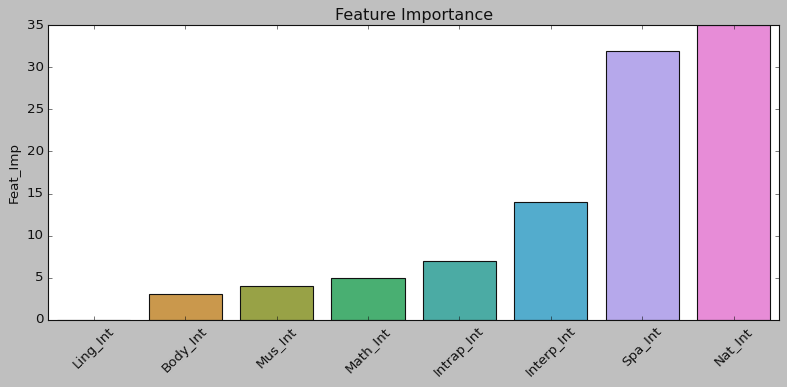

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_validate
model = LGBMClassifier(colsample_bytree = 0.2,
                       learning_rate = 0.005,
                       max_depth = 1,
                       n_estimators = 100,
                       subsample = 0.5,
                       random_state=42)
model.fit(X_train, y_train)
Feat_Imp = pd.DataFrame(index=X.columns,
                        data = model.feature_importances_, 
                        columns = ["Feat_Imp"]).sort_values("Feat_Imp")
plt.figure(figsize=(10,5))
sns.barplot(x = Feat_Imp.index, y = 'Feat_Imp', data = Feat_Imp)
plt.title("Feature Importance")
plt.xticks(rotation = 45)
plt.tight_layout();

## ALL Scores

### All Scores

In [ ]:
all_scrs = pd.concat([lr_mid_scrs,
                      knn_mid_scrs,
                      svc_mid_scrs,
                      dt_mid_scrs,
                      rf_mid_scrs,
                      ada_mid_scrs,
                      grd_mid_scrs,
                      xgb_mid_scrs,
                      lgb_mid_scrs],
                      axis=1)
all_scrs

,lr,lr_grd,lr_mms,lr_grd_mms,lr_ss,lr_grd_ss,knn,knn_grd,knn_mms,knn_grd_mms,...,xgb_mms,xgb_grd_mms,xgb_ss,xgb_grd_ss,lgb,lgb_grd,lgb_mms,lgb_grd_mms,lgb_ss,lgb_grd_ss
acc,0.53,0.50,0.53,0.53,0.50,0.53,0.40,0.43,0.40,0.57,...,0.43,0.53,0.53,0.53,0.53,0.53,0.53,0.43,0.43,0.43
prc,0.50,0.48,0.50,0.50,0.48,0.50,0.42,0.41,0.42,0.67,...,0.40,0.50,0.50,0.50,0.50,0.50,0.50,0.44,0.44,0.44
rec,0.71,0.86,0.71,0.71,0.86,0.71,0.79,0.50,0.71,0.14,...,0.43,0.50,0.50,0.50,0.79,0.79,0.79,0.79,0.79,0.79
f1s,0.59,0.62,0.59,0.59,0.62,0.59,0.55,0.45,0.53,0.24,...,0.41,0.50,0.50,0.50,0.61,0.61,0.61,0.56,0.56,0.56
roc,0.54,0.52,0.54,0.54,0.52,0.54,0.42,0.44,0.42,0.54,...,0.43,0.53,0.53,0.53,0.55,0.55,0.55,0.46,0.46,0.46


In [ ]:
all_scrs = all_scrs.T
all_scrs	

,acc,prc,rec,f1s,roc
lr,0.53,0.50,0.71,0.59,0.54
lr_grd,0.50,0.48,0.86,0.62,0.52
lr_mms,0.53,0.50,0.71,0.59,0.54
lr_grd_mms,0.53,0.50,0.71,0.59,0.54
lr_ss,0.50,0.48,0.86,0.62,0.52
lr_grd_ss,0.53,0.50,0.71,0.59,0.54
knn,0.40,0.42,0.79,0.55,0.42
knn_grd,0.43,0.41,0.50,0.45,0.44
knn_mms,0.40,0.42,0.71,0.53,0.42
knn_grd_mms,0.57,0.67,0.14,0.24,0.54


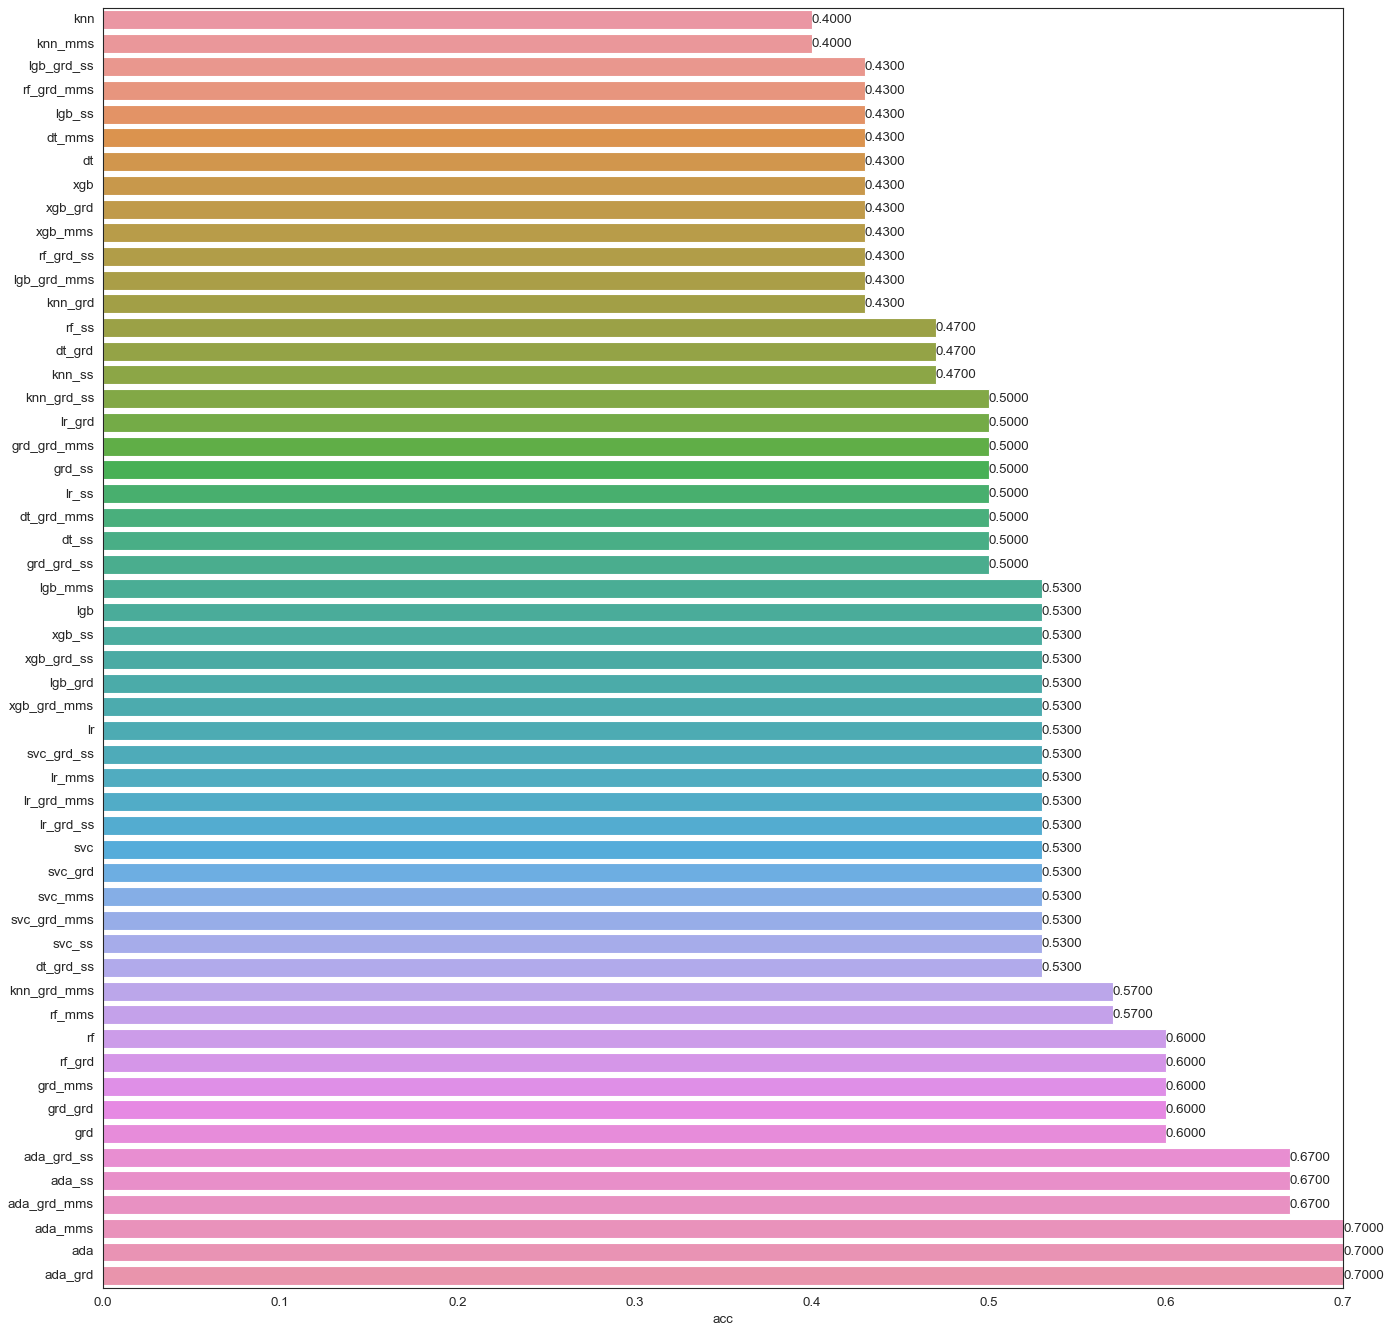

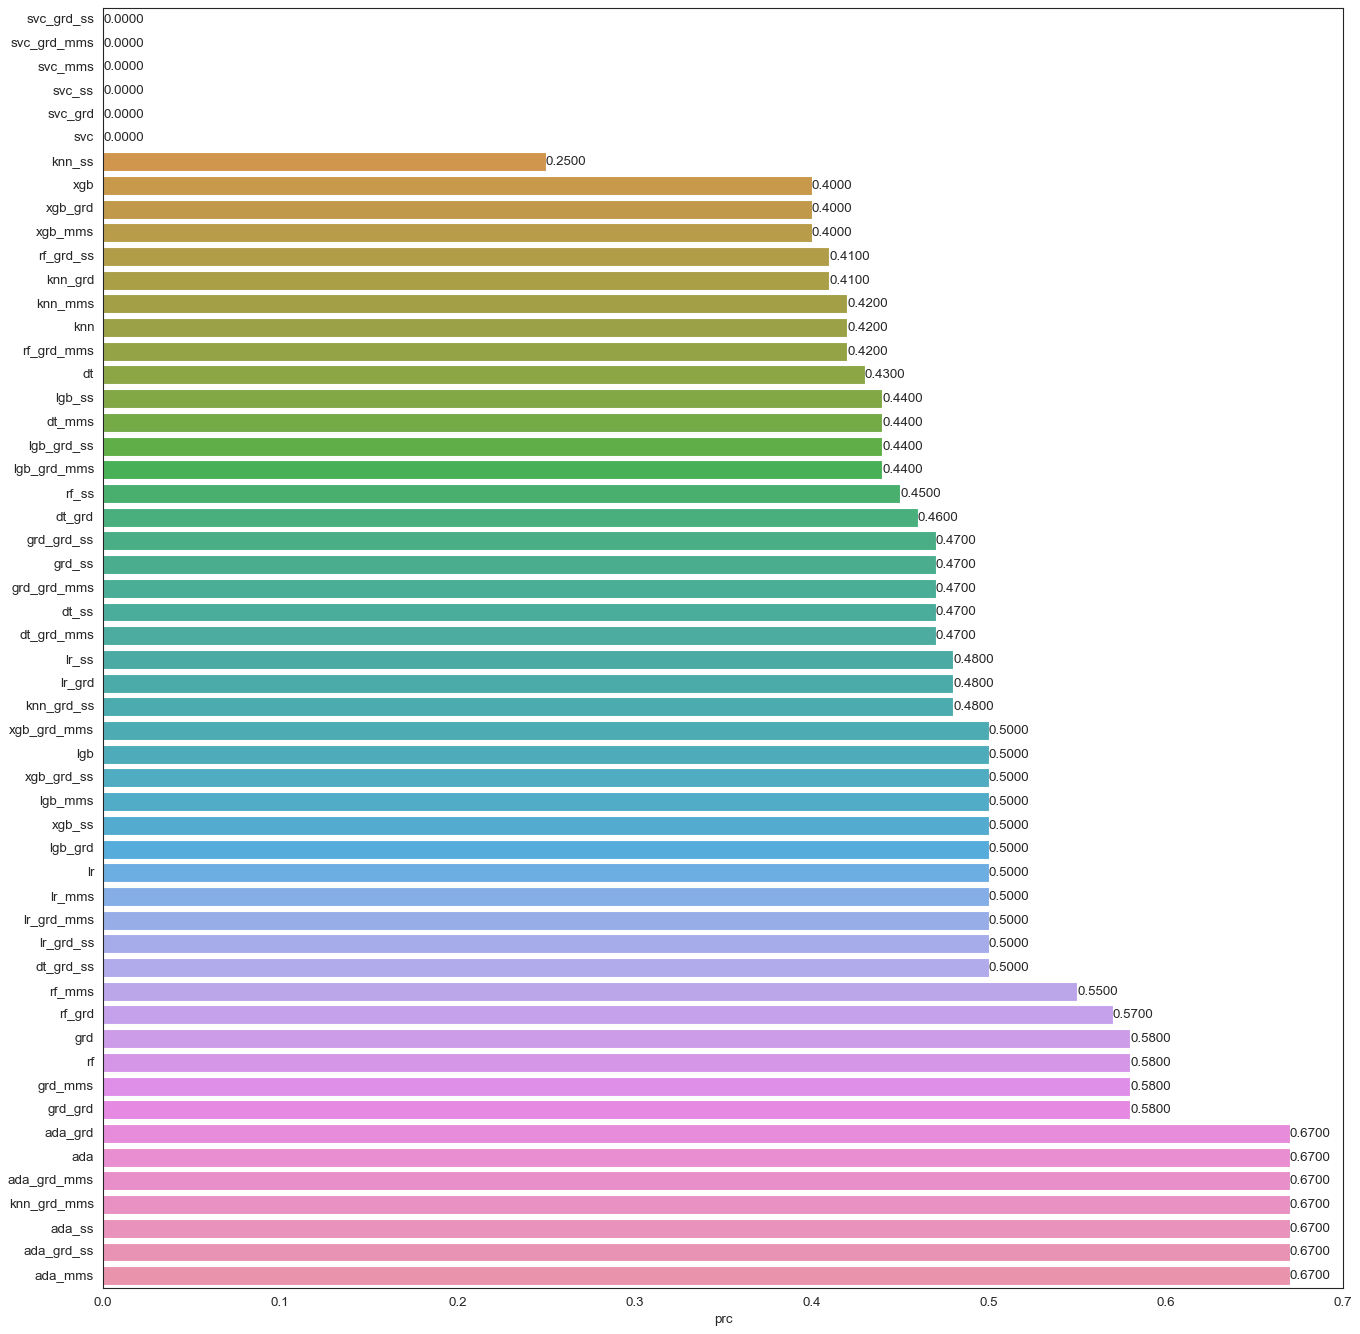

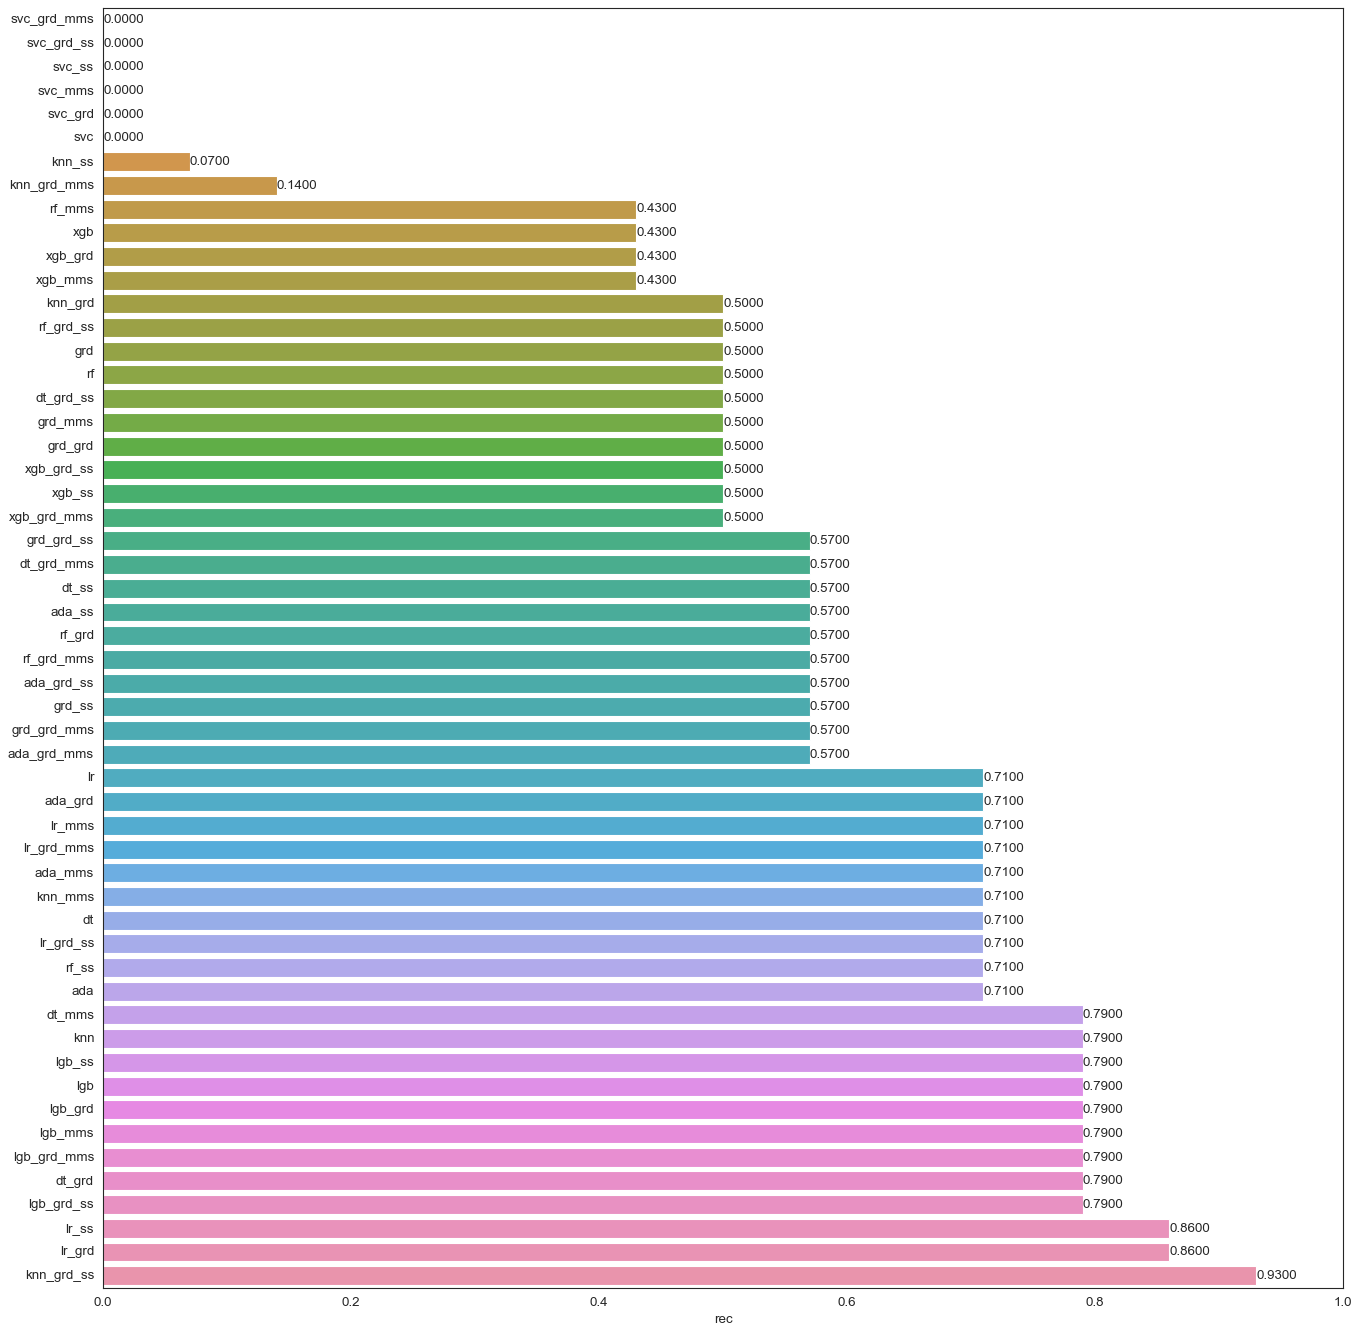

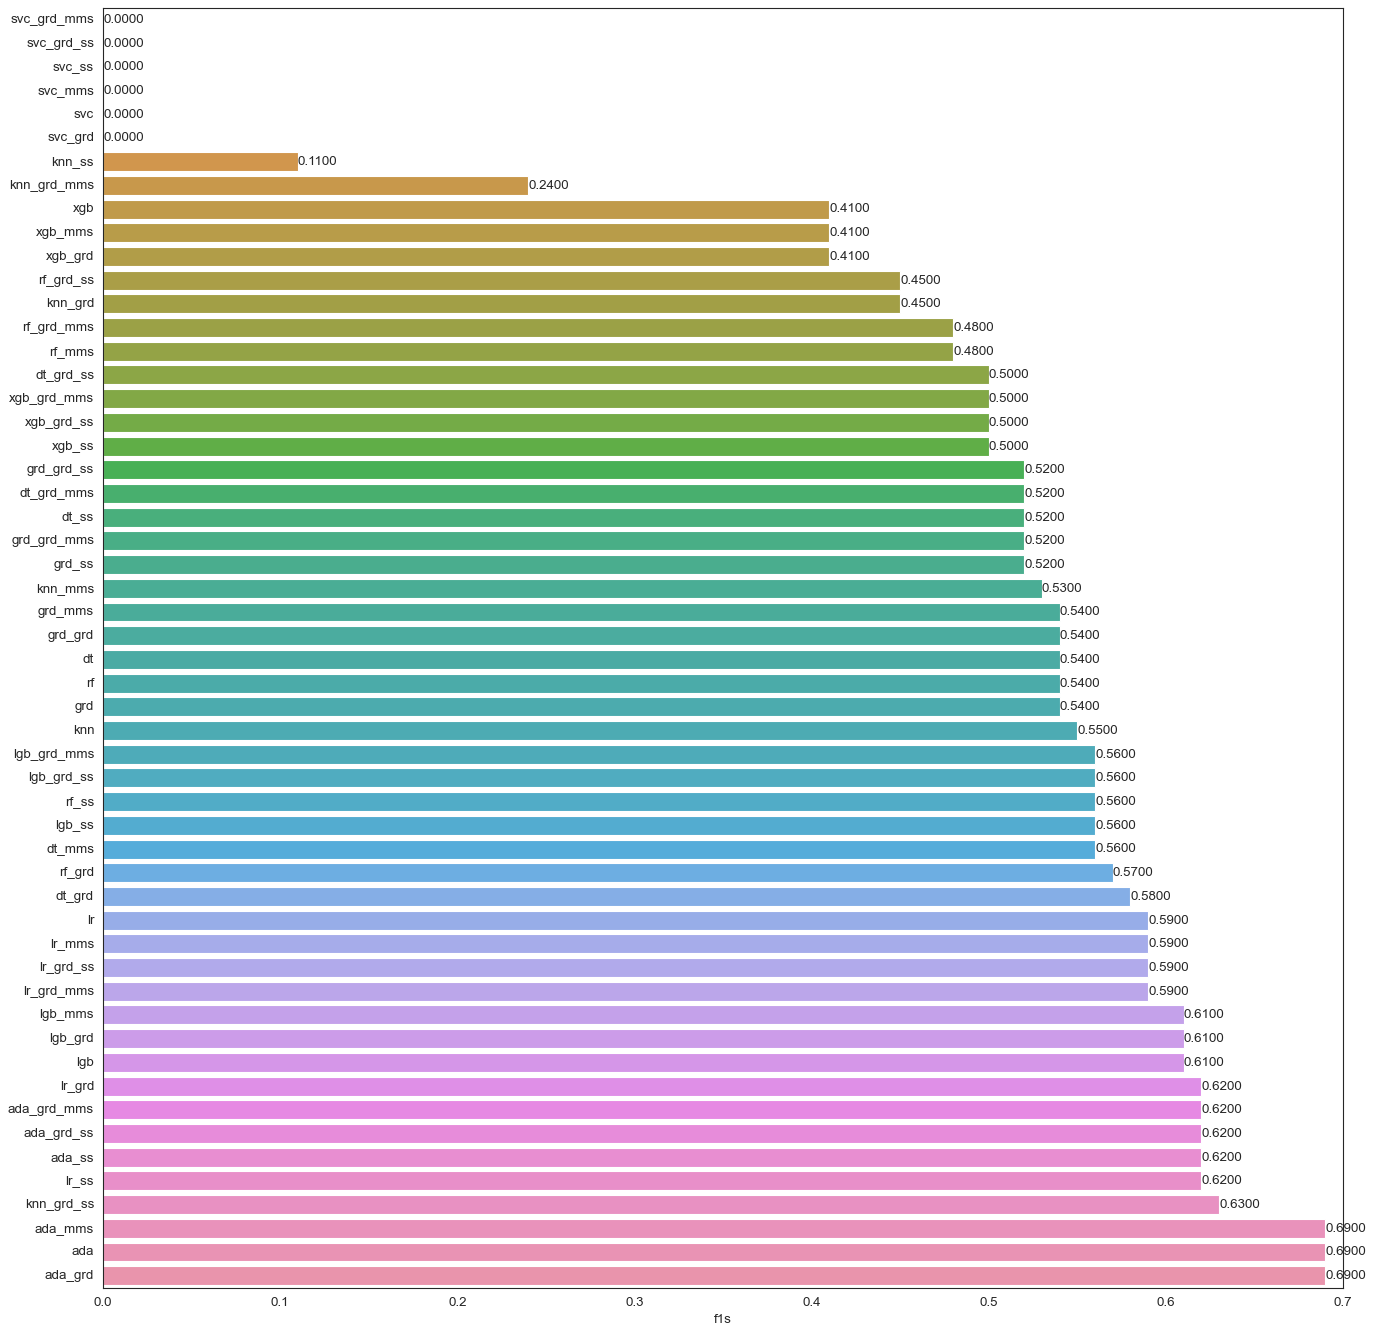

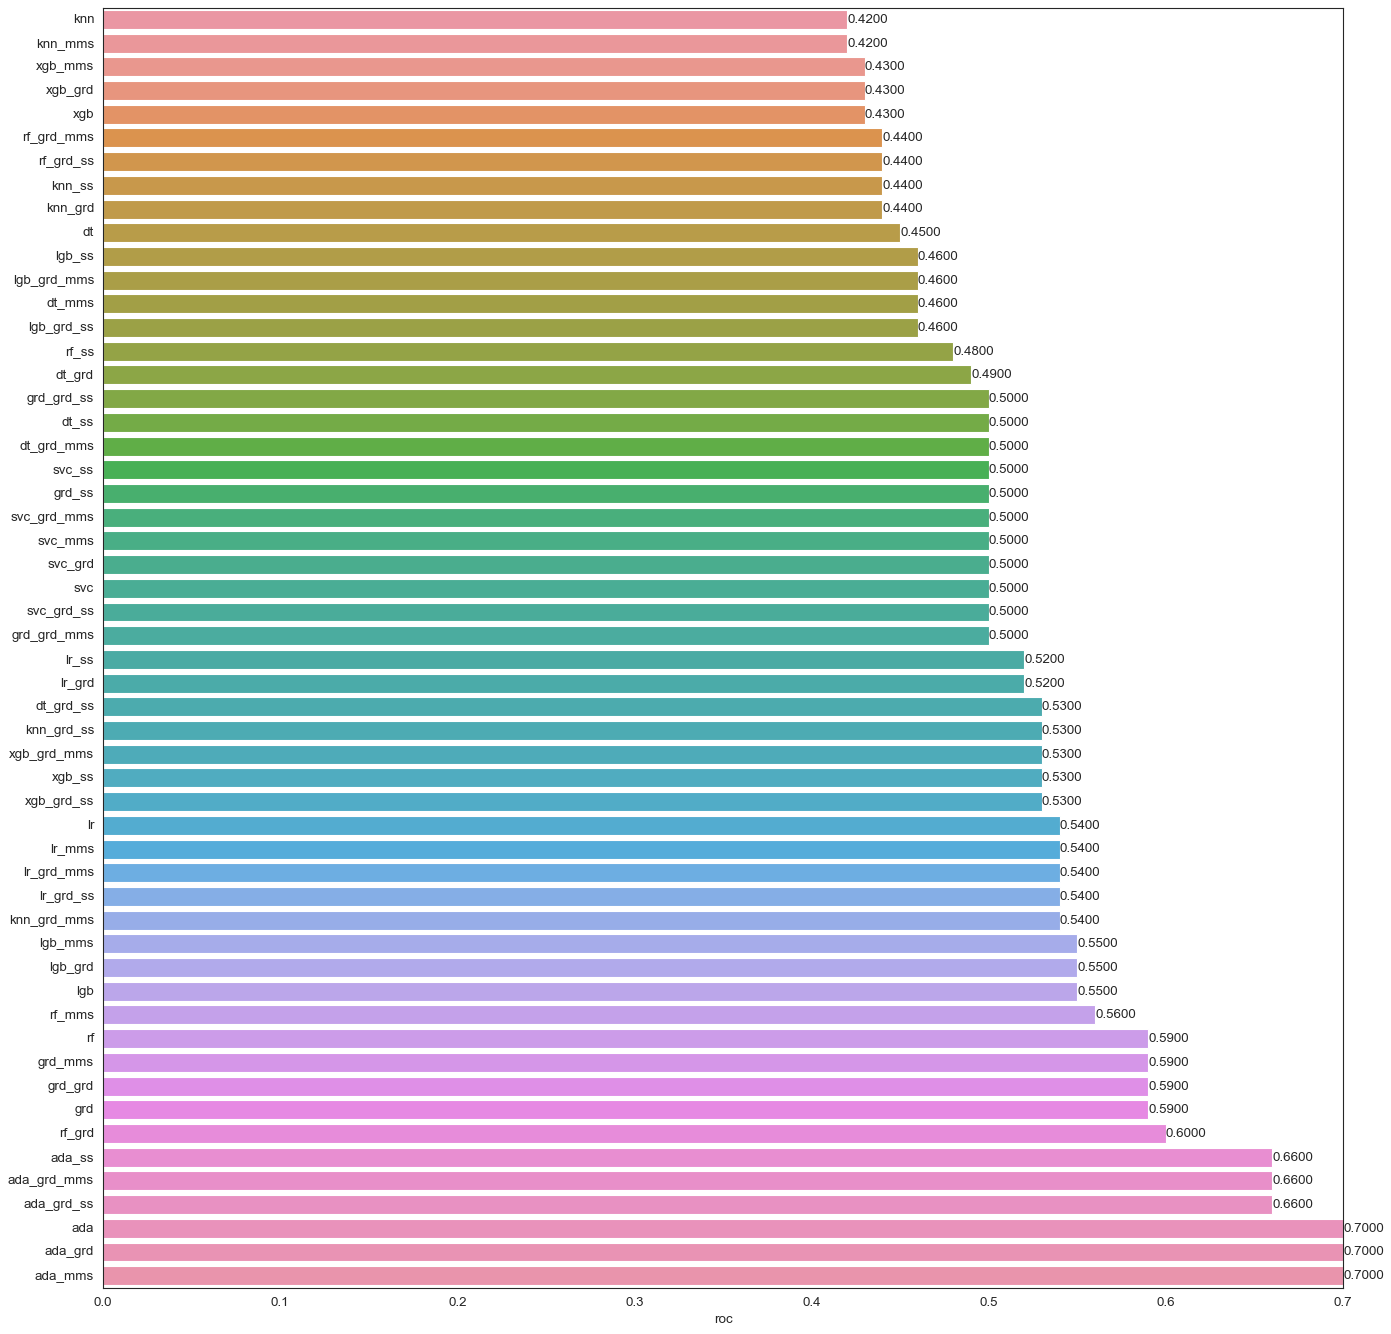

In [ ]:
plt.style.use('classic')
sns.set_style("white")
metrics = all_scrs.columns
for i,j in enumerate(metrics):
    plt.figure(i, figsize=(20,20))
    if j == "R2":
        ascending = False
    else:
        ascending = True
    compare = all_scrs.sort_values(by=j, ascending=ascending)
    ax = sns.barplot(x = compare[j] , y= compare.index)
    for p in ax.patches:
            width = p.get_width()                      
            ax.text(width,                              
                    p.get_y() + p.get_height() / 2,     
                    '{:.4f}'.format(width),             
                    ha = 'left',                         
                    va = 'center') 
plt.tight_layout;

## Best Model

### Ada & GridSearchCV & Optimal Threshold


In [ ]:
# ada_model & Not Scaled & GridSearchCV & Optimal Threshold
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

ada_model = AdaBoostClassifier(random_state=42)
param_grid = {"n_estimators": [50, 60, 100],
              "learning_rate": [0.01, 0.1, 0.2, 0.5, 1.0]}
ada_grd = GridSearchCV(ada_model, param_grid, scoring = "accuracy", n_jobs = -1, verbose = 2)

ada_grd.fit(X_train, y_train)
y_test_prd = ada_grd.predict(X_test)
y_test_prd_prb = pd.Series(ada_grd.predict_proba(X_test)[:,1])

y_train_prd_prb = ada_grd.predict_proba(X_train)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

ada_scores = {"ada_grd": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                          "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                          "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                          "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                          "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

ada_scr = pd.DataFrame(ada_scores, index=["acc","prc","rec","f1s", "roc"])
print(ada_grd.best_params_)
ada_scr

Fitting 5 folds for each of 15 candidates, totalling 75 fits
{'learning_rate': 1.0, 'n_estimators': 100}


,ada_grd
acc,0.67
prc,0.67
rec,0.57
f1s,0.62
roc,0.66


## Final Model / Predict

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
final_model = AdaBoostClassifier(n_estimators=100, learning_rate=1.0, random_state=42)
final_model.fit(X, y)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [ ]:
columns_name = X.columns

In [ ]:
pred = [[35, 36, 34, 37, 15, 17, 19, 21]]
pred_data = pd.DataFrame(data=pred, columns=columns_name)
pred_data

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int
0,35,36,34,37,15,17,19,21


In [ ]:
print("optimal_threshold_rac:", optimal_threshold_rac)

optimal_threshold_rac: 0.5230605972395915


In [ ]:
predictions1 = final_model.predict(pred_data)[0]
predictions1

0

In [ ]:
predictions_proba = final_model.predict_proba(pred_data)
print(predictions_proba[0])
print(predictions_proba[0][0])
print(predictions_proba[0][1])

[0.58531685 0.41468315]
0.585316849624688
0.41468315037531195


In [ ]:
predictions2 = [1 if predictions_proba[0][1] >= optimal_threshold_rac else 0][0] 
predictions2

0

In [ ]:
pred_data["pred1"] = predictions1
pred_data["pred_proba"] = predictions_proba[0][0]
pred_data["pred2"] = predictions2
pred_data

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int,pred1,pred_proba,pred2
0,35,36,34,37,15,17,19,21,0,0.59,0


In [ ]:
MI_Cat = columns_name[np.argmax(pred_data)]
MI_Score = max(pred[0])
Best_Threshold = optimal_threshold_rac

if predictions_proba[0][1] >= Best_Threshold:
    print(f"MI_Cat\t\t\t: {MI_Cat}\nMI_Score\t\t: {MI_Score}\nBest_Threshold\t\t: {Best_Threshold}\nPredictions_Proba\t: {predictions_proba[0][1]}\nPrediction\t\t: 1\nResult\t\t\t: Pilot")
if predictions_proba[0][1] < Best_Threshold:
    print(f"MI_Cat\t\t\t: {MI_Cat}\nMI_Score\t\t: {MI_Score}\nBest_Threshold\t\t: {Best_Threshold}\nPredictions_Proba\t: {predictions_proba[0][1]}\nPrediction\t\t: 0\nResult\t\t\t: Not Pilot")

MI_Cat			: Mus_Int
MI_Score		: 37
Best_Threshold		: 0.5230605972395915
Predictions_Proba	: 0.41468315037531195
Prediction		: 0
Result			: Not Pilot
